In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 


### As the first step of EDA - Data understanding, open the excel loan.csv and briefly look at the different columns, data/datatype and refer the data dictionary for getting a better context of the data

### There are lot of columns/data in the csv file due to which its really difficult to make best sense out of it. So lets remove the columns which doesnt has any meaningful data for our anlysis. When we have less columns, we will again look into the file.


In [139]:
df = pd.read_csv('loan.csv')
df.shape

(39717, 111)

### Calculate number of missing values in each column

In [140]:
dictionary = {}

for column in df:
    dictionary[column] = df[column].isna().sum()
dictionary

{'id': 0,
 'member_id': 0,
 'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 2459,
 'emp_length': 1075,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'pymnt_plan': 0,
 'url': 0,
 'desc': 12940,
 'purpose': 0,
 'title': 11,
 'zip_code': 0,
 'addr_state': 0,
 'dti': 0,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 25682,
 'mths_since_last_record': 36931,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 50,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 71,
 'last_pymnt_amnt': 0,
 'next_pymnt_d': 38577,
 'last_credit_pull_d': 2,
 'collections_12_mths_ex_med': 56,
 'mt

### There are many columns which doesnt have any relevant values. We can delete the columns where more than 80% of the cells are blank i.e. where na count > 32000 (~80% of 39717). Deleting these columns from the Dataframe

In [141]:
for key, val in dictionary.items():
    if(val > 32000):
        del df[key]


In [142]:
df.shape

(39717, 55)

### Now, since the dataframe has now less columns, save it as a new csv file to analyze the columns manually 

In [143]:
df.to_csv('loan1.csv')

It seems that there are various columns which has just single value. We need to delete the columns where there is a single value in all the columns as it doesnt adds any value to the analysis.

In [144]:
for column in df:
    if len((df[column].value_counts())) == 1:
                del df[column]

In [145]:
df.shape

(39717, 46)

### There are many columns which are Customer behavior variables which have relevancy only post Loan approval. These variables will add no value to our analyses so can be safely deleted

In [146]:
cust_behavior = ["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [147]:
df.drop(cust_behavior, axis = 1, inplace = True)

In [148]:
df.shape

(39717, 26)

In [149]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'mths_since_last_delinq', 'pub_rec_bankruptcies'],
      dtype='object')

### The columns - url, desc, zip_code, addr_state and emp_title are free text columns and these values cannot be used for any comparison purpose. Deleting these columns

In [150]:
df.drop(['url','desc','zip_code', 'addr_state'], axis = 1, inplace = True)

In [151]:
df.drop(['emp_title'], axis = 1, inplace = True)

In [152]:
df.shape

(39717, 21)

### The columns id and member_id are unique value identity columns just to identity the customer. We can delete the member_id column as we already have id column

In [153]:
df.drop(['member_id'], axis = 1, inplace = True)

In [154]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### The loan_status value 'Current' cannot be considered in the analysis as these customers can either get converted into 'Fully paid' or 'Charged Off'. We need to consider only the values where loan_status is not 'Current'

In [155]:
#Removing current loan status rows
df = df[df.loan_status != 'Current']

In [156]:
df.shape

(38577, 20)

### Now check the column types if any type conversion is needed to as to be used in Univariat and bivariat analyses

In [157]:
df.dtypes

id                          int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
title                      object
dti                       float64
mths_since_last_delinq    float64
pub_rec_bankruptcies      float64
dtype: object

### There are many columns which shouldnt have been inferred as Object datatype. Need to analyse these columns if there are any extra characters/junk values which are not letting the columns to be type casted to float64. Clean the data and change it to meaningful datatype

In [158]:
df.term.unique()                       

array([' 36 months', ' 60 months'], dtype=object)

### The column term has just 2 values so we can leave it as it and we will treat it as a categorical value

In [159]:
df.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

Remove the '%' from the int_rate values and convert into float

In [160]:
df.int_rate =  pd.to_numeric(df.int_rate.str.replace('%',''))

In [161]:
df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [162]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [163]:
df['emp_length'].isna().sum()

1033

### There are two values i.e. 10+ and < 1 due to which the column cannot be converted to Float. We can treat experience < 1 as 1 (treating as 0 might mean that he is unemployed which is not the case) and 10+ years as 10. Lets do the conversion

In [164]:
def removeCharInEmpLength(charList):
    for char in charList:
        df['emp_length'] = df['emp_length'].str.replace(char,'')
        
removeCharInEmpLength([' years',' year','< ', '+'])

df['emp_length'] = pd.to_numeric(df['emp_length']) #change to Integer type
df['emp_length'].fillna(0,inplace=True)         

### Need to delete column pub_rec_bankruptcies as this is also customer behavior attribute

In [165]:
del df['mths_since_last_delinq']

In [166]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [167]:
(df[(df['pub_rec_bankruptcies'].isna()) & (df['loan_status'] == 'Fully Paid')]).shape

(579, 19)

In [168]:
(df[(df['pub_rec_bankruptcies'].isna()) & (df['loan_status'] == 'Charged Off')]).shape

(118, 19)

In [169]:
df['pub_rec_bankruptcies'].median()

0.0

In [170]:
# fill pub_rec_bankruptcies na with 0, as pub_rec_bankruptcies as 'na', the percentage of fully paid is high compared to 
# charged off which is similar to overall distribution - median is 0
df['pub_rec_bankruptcies'].fillna(0.0,inplace=True)

In [171]:
# deleting title columns as this is a free flow text column and doesnt provides any meaningful insight
del df['title']

### Derived columns - issue_month out of issue_d. Year will not be meaningful for our anaysis as it is not going to be repeated in future, only the pattern related months can add values

In [172]:
df['issue_month'] = df['issue_d'].str.split('-').apply(lambda x: x[0])

In [173]:
#delete the issue_d column as we dont need it any further
del df['issue_d']

### bucketing columns into categorical and continuous types - columns having less unique value count is categorical and others are continuous

In [174]:
for column in df:
    print(column, ' ', len(df[column].unique()))


id   38577
loan_amnt   870
funded_amnt   1019
funded_amnt_inv   8050
term   2
int_rate   370
installment   15022
grade   7
sub_grade   35
emp_length   11
home_ownership   5
annual_inc   5215
verification_status   3
loan_status   2
purpose   14
dti   2853
pub_rec_bankruptcies   3
issue_month   12


In [175]:
categorical_columns = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'pub_rec_bankruptcies', 'issue_month']

In [176]:
continuous_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']

### Plot categorical columns to see their distribution

------------- term ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


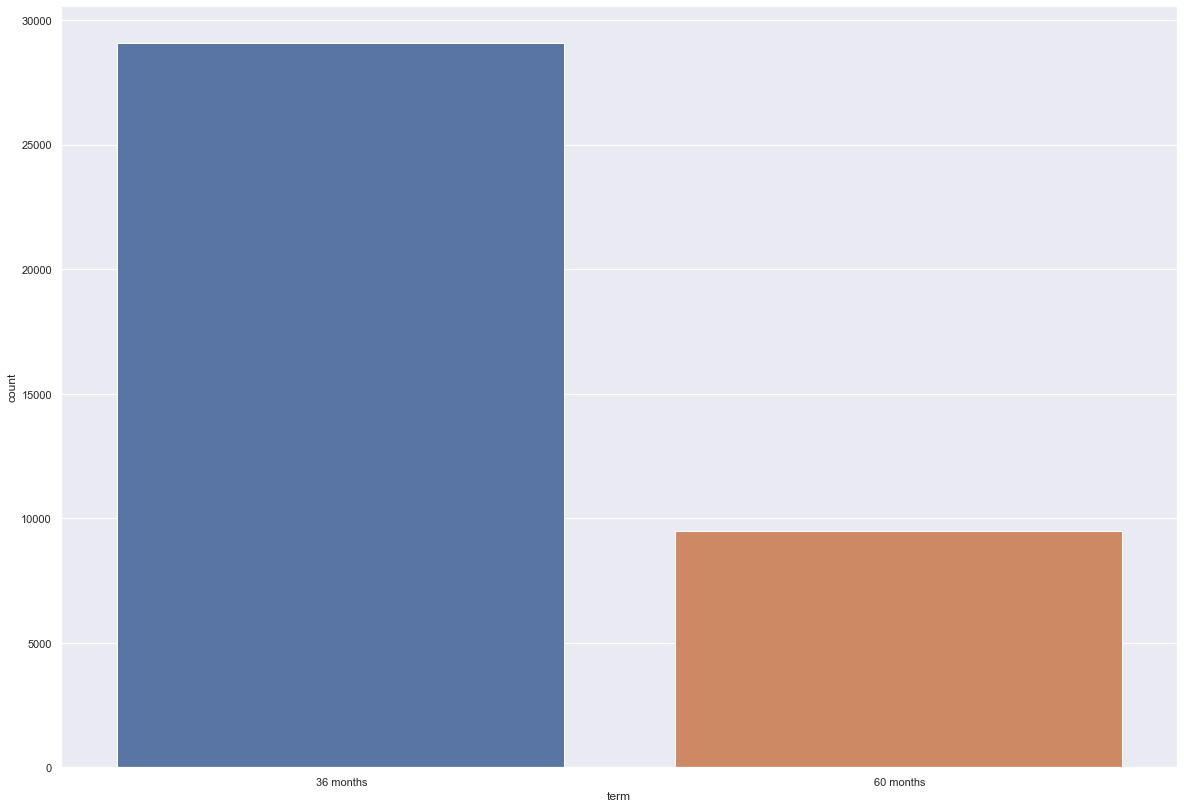

------------- grade ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


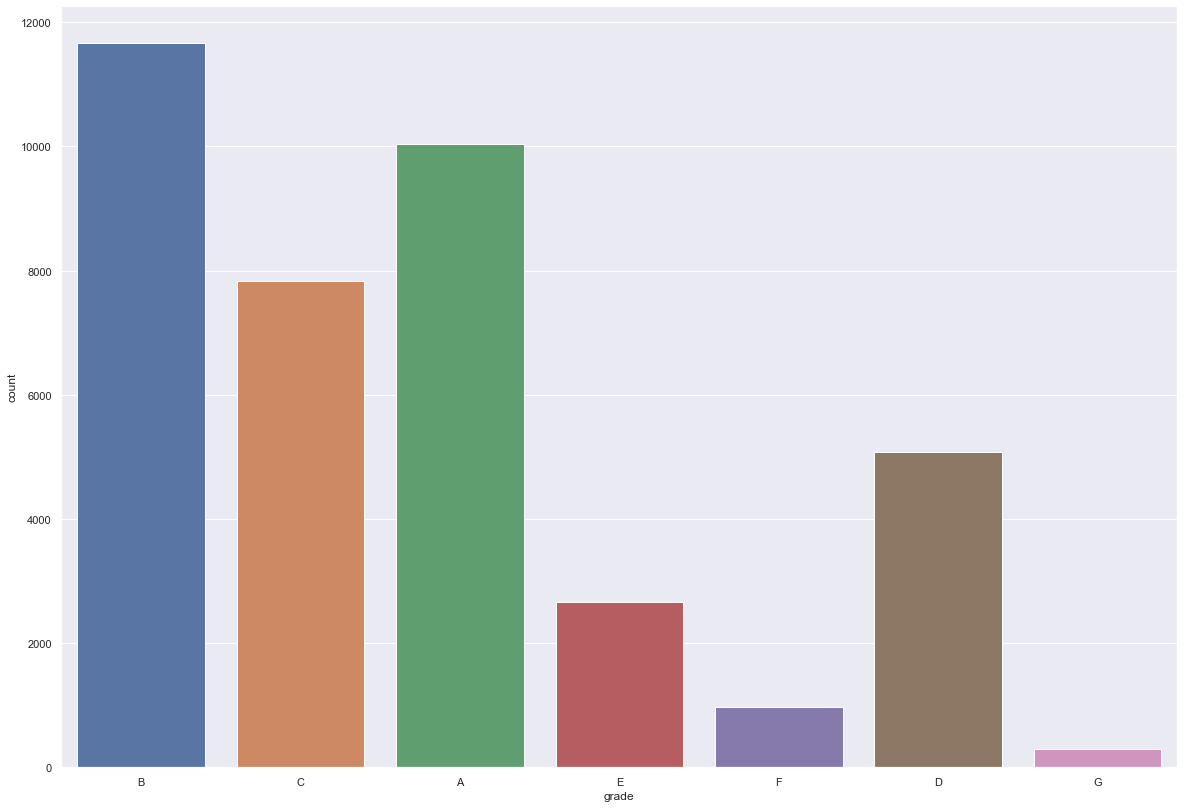

------------- sub_grade ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


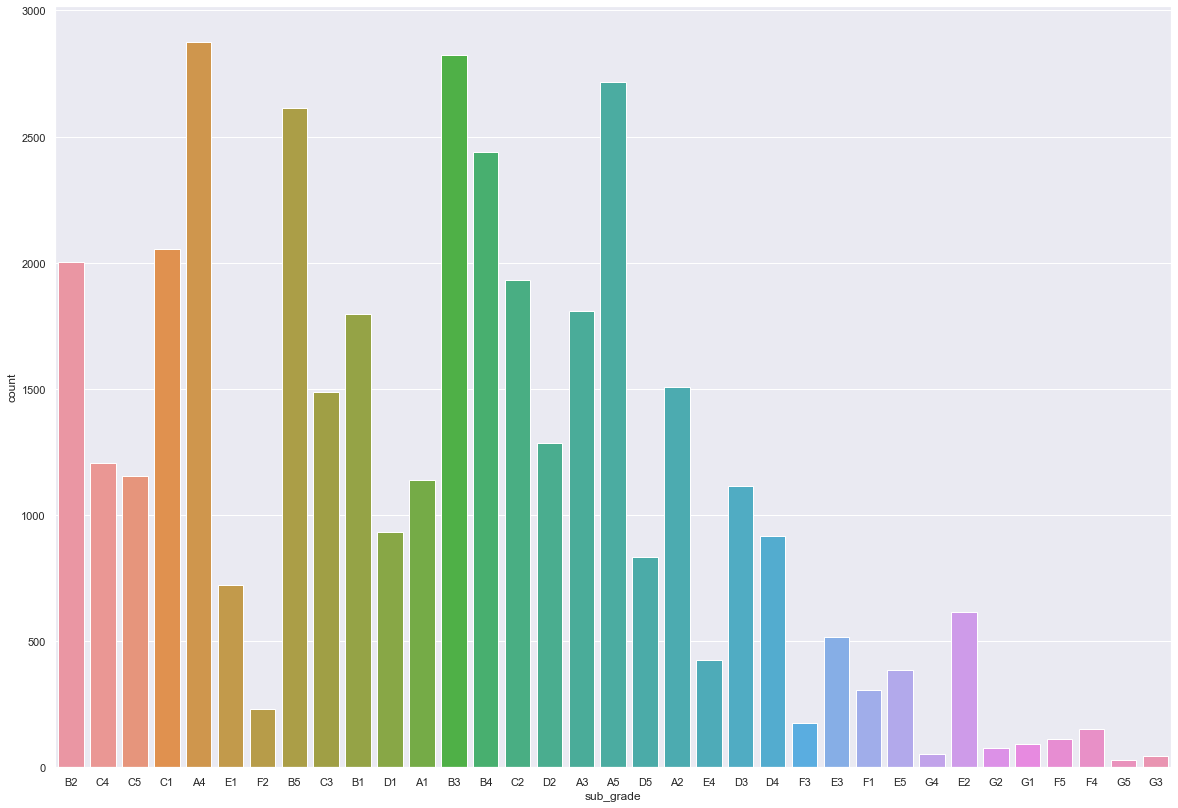

------------- emp_length ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


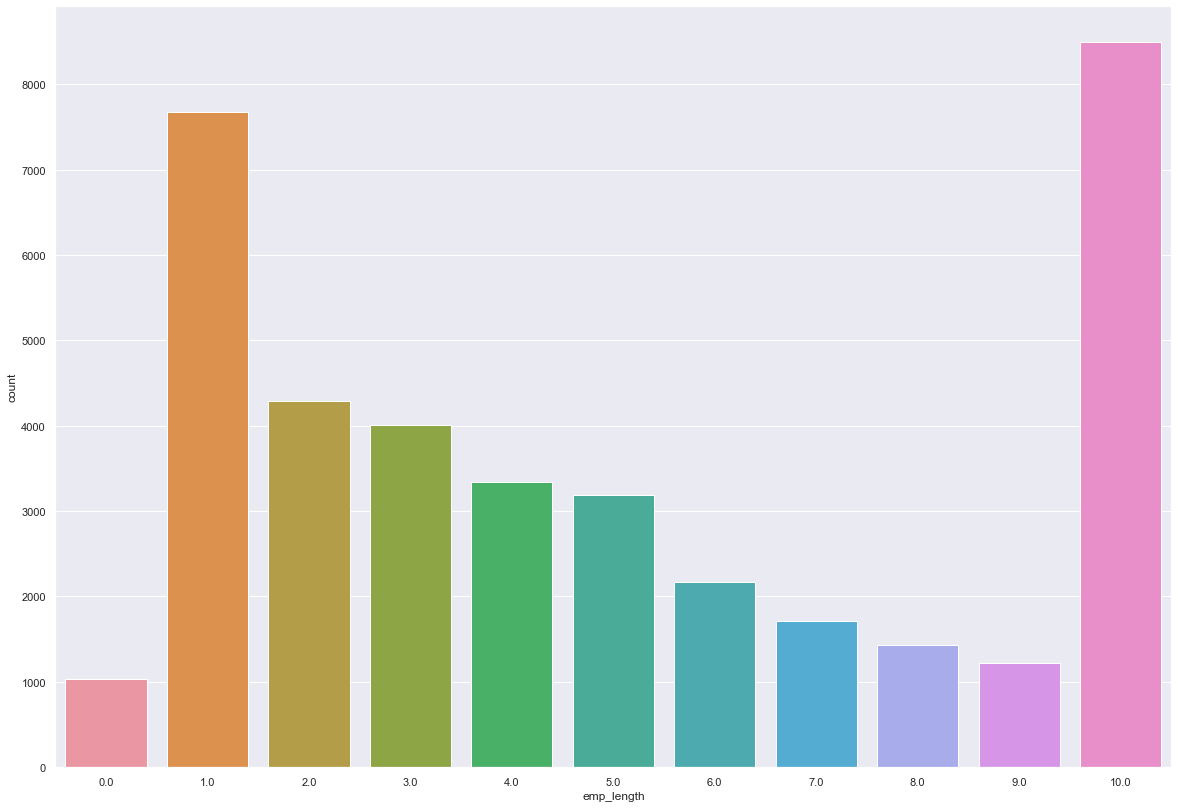

------------- home_ownership ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


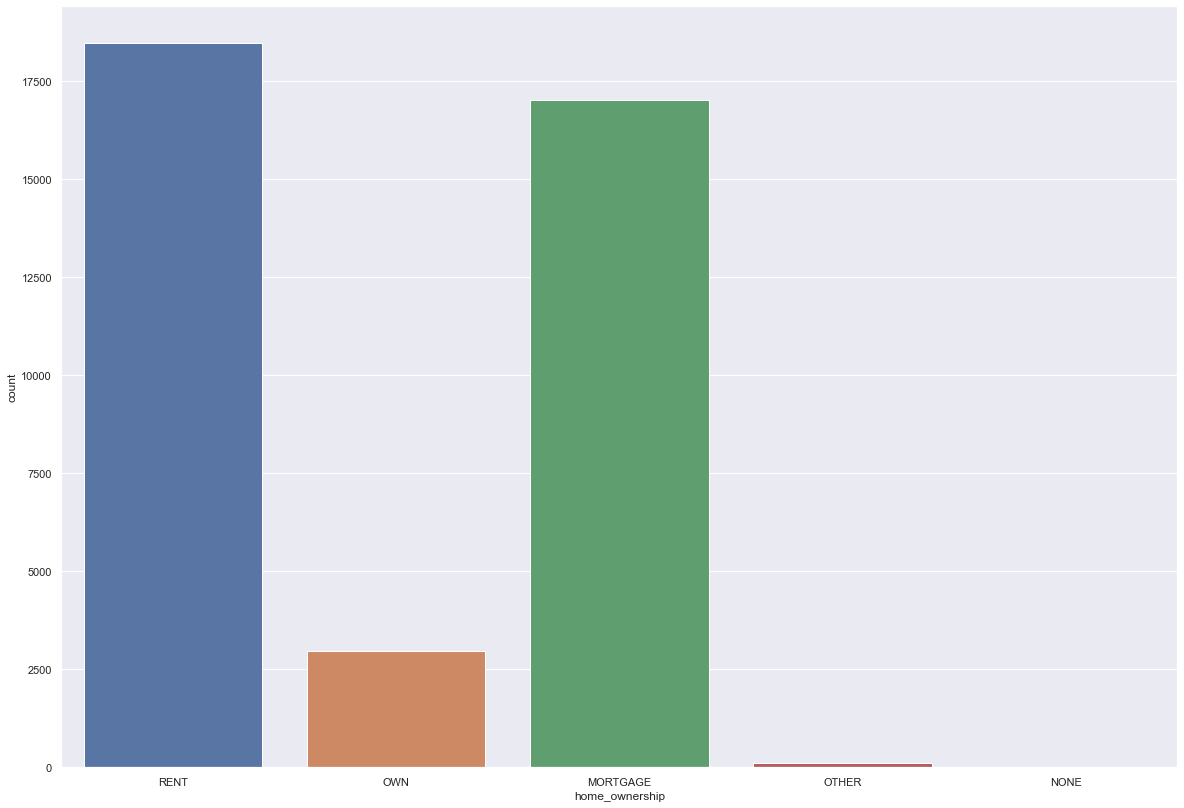

------------- verification_status ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


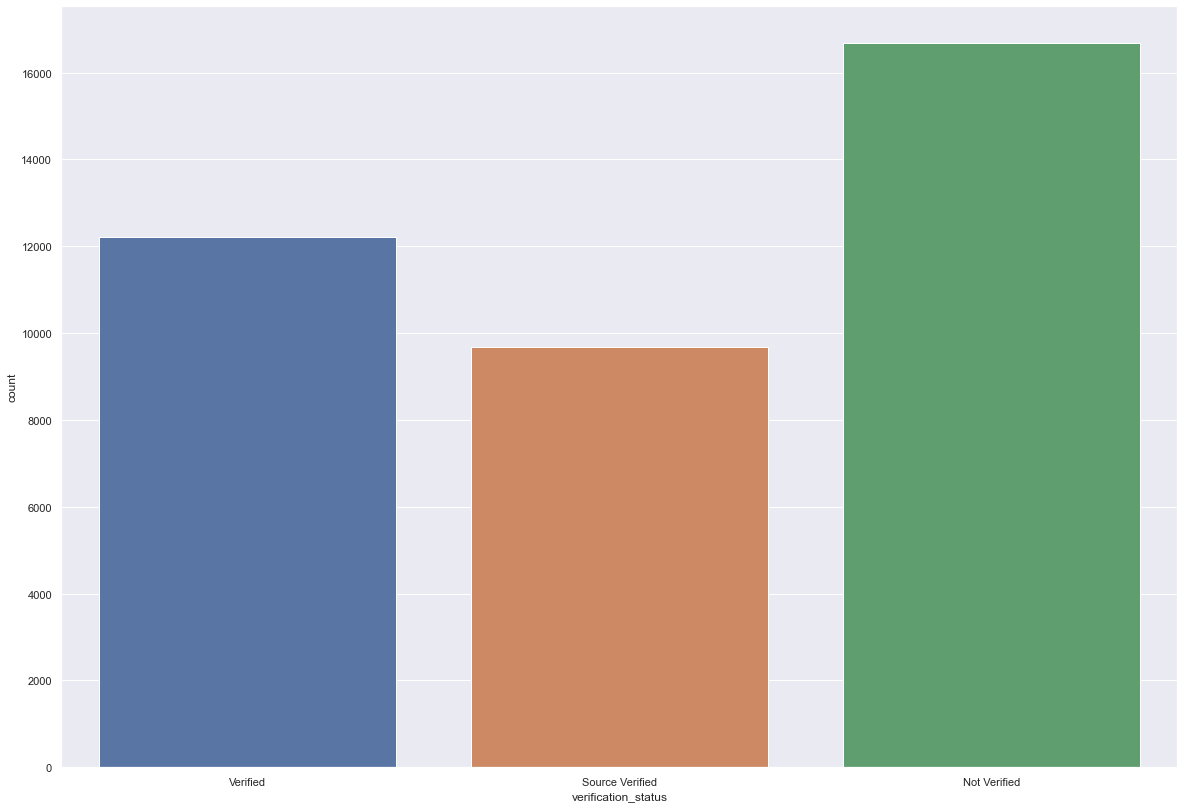

------------- loan_status ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


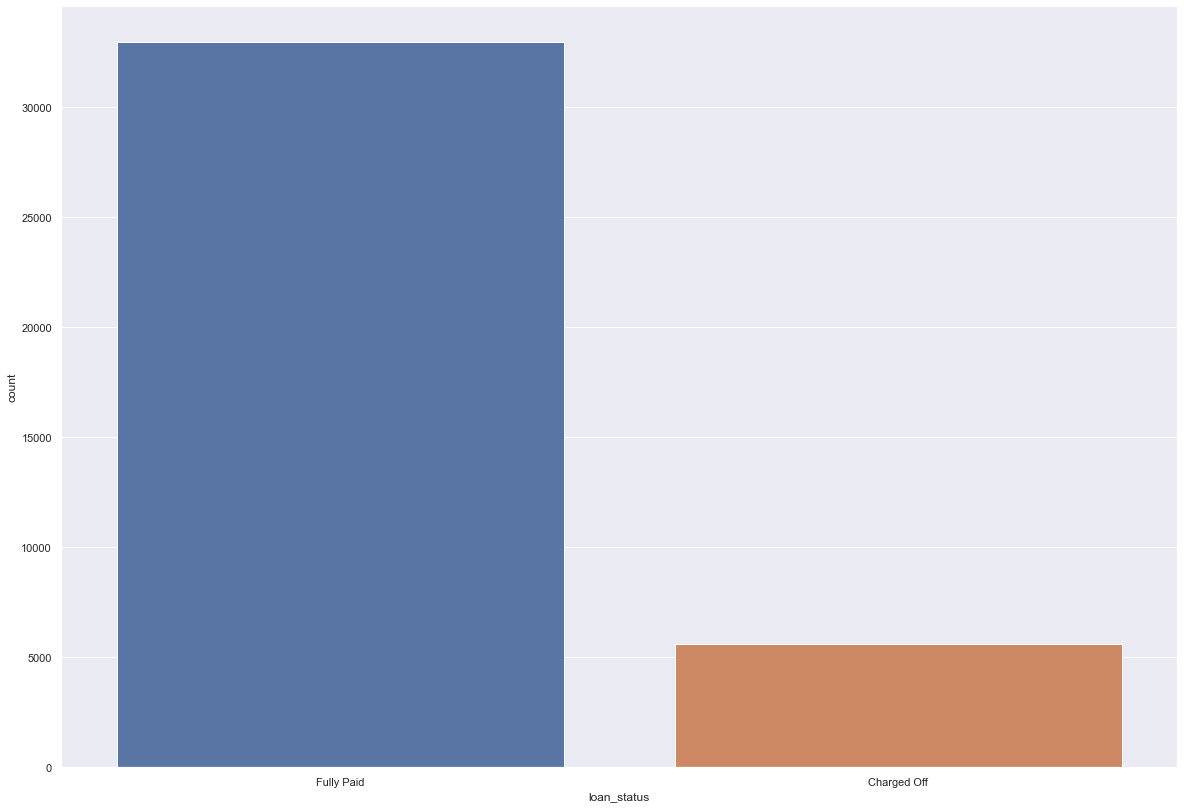

------------- purpose ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


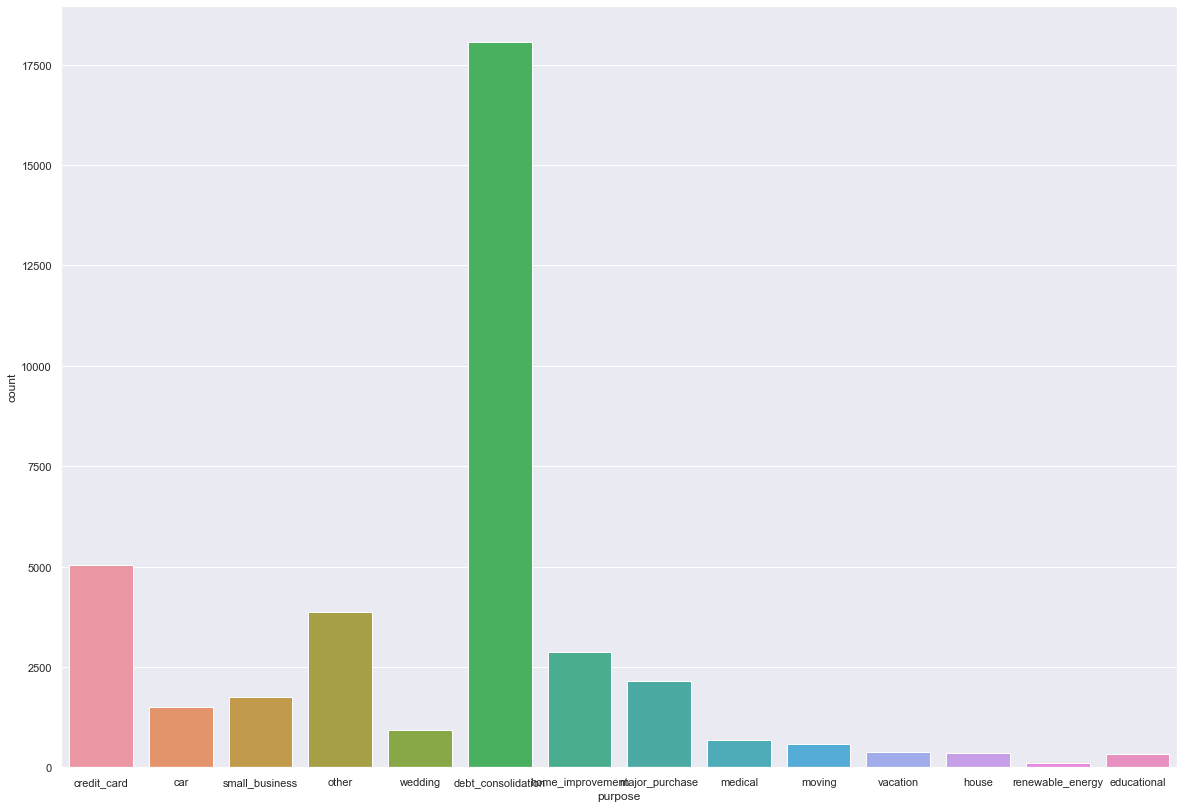

------------- pub_rec_bankruptcies ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


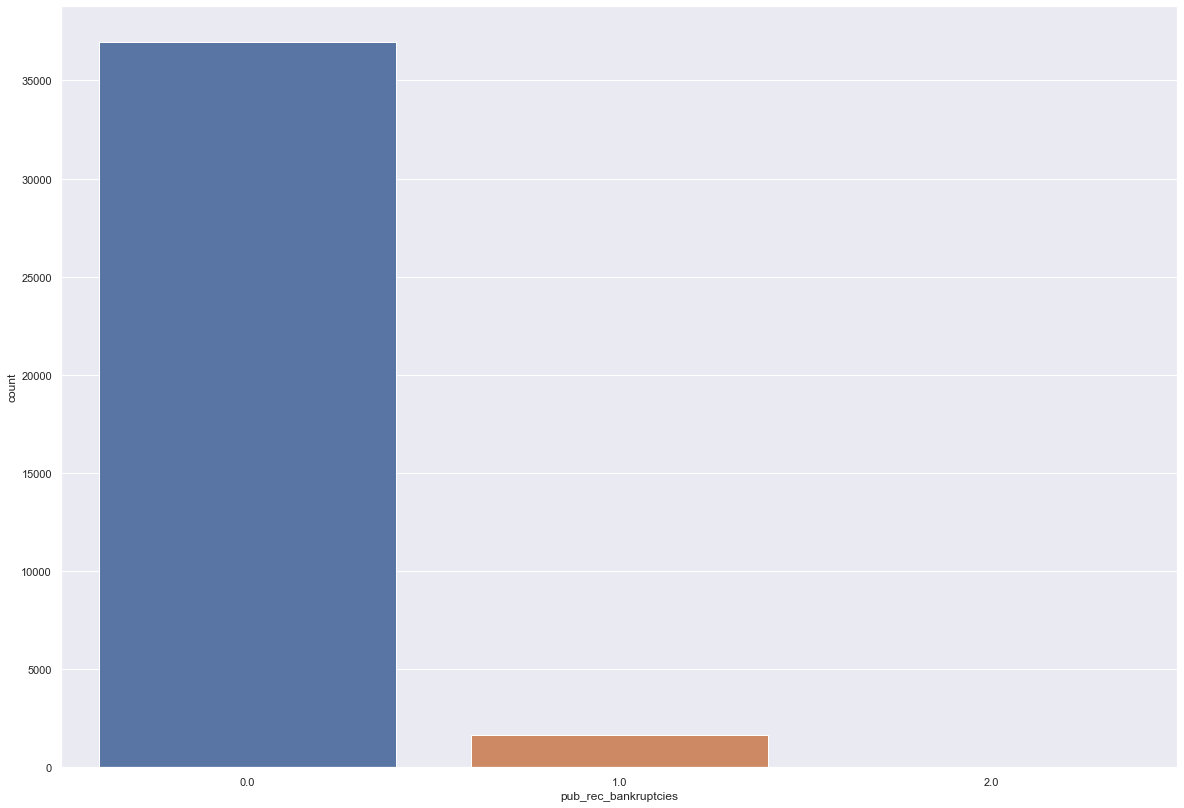

------------- issue_month ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


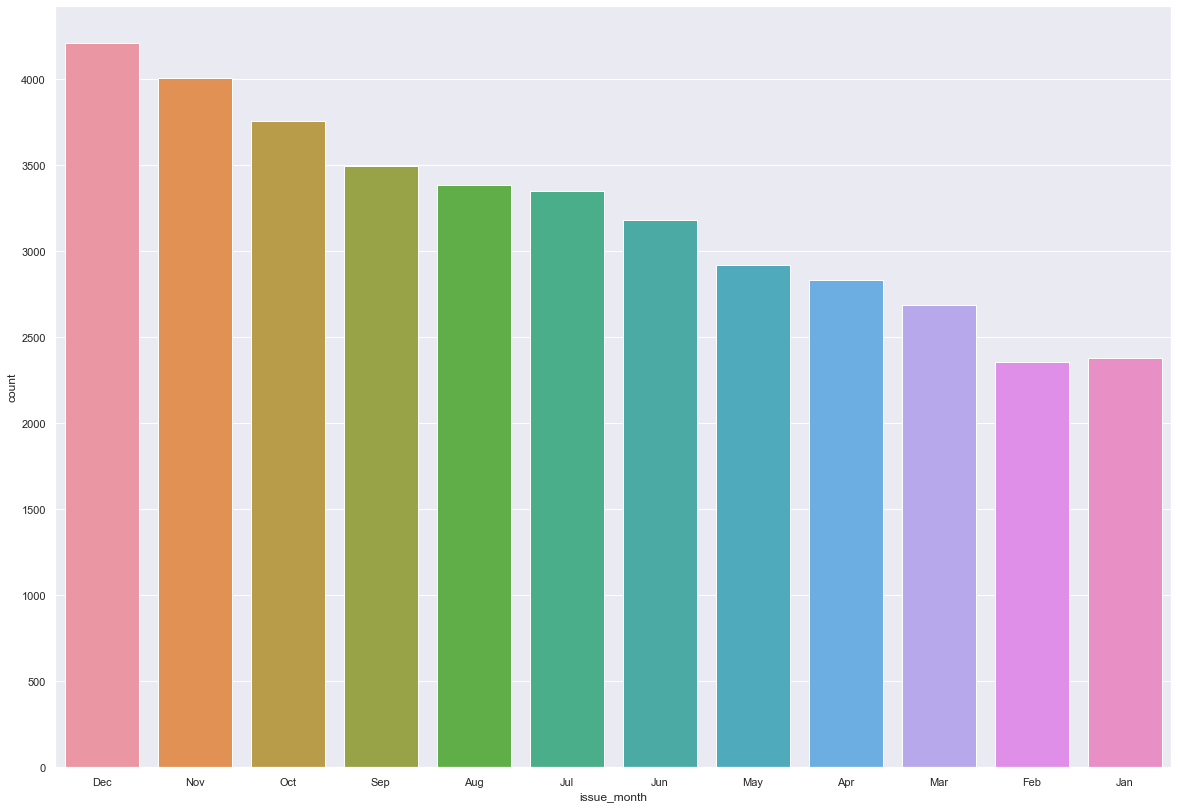

In [177]:
for i in categorical_columns:
    print("-------------", i, "------------------------")
    sns.countplot(df[i])
    plt.show()

## Distribution and Outliers range in continuous variable 

#### box plot continuous variables to analyze outliers

------------- loan_amnt ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


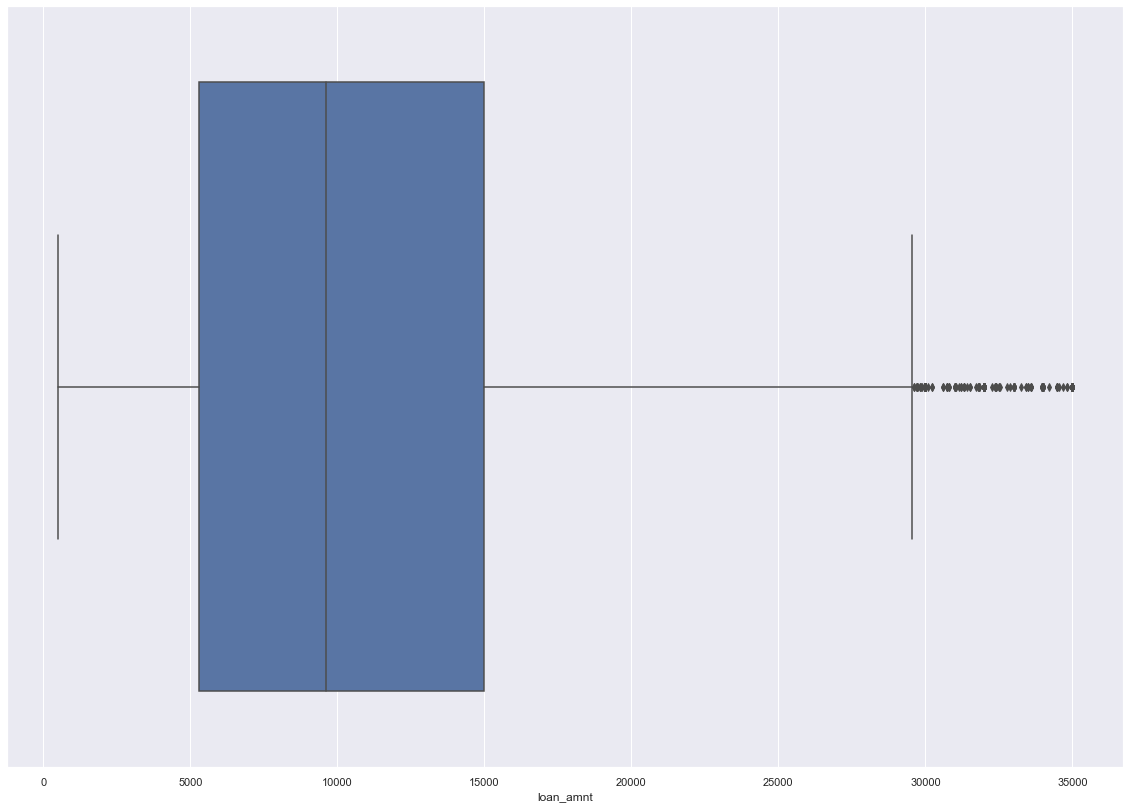

------------- funded_amnt ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


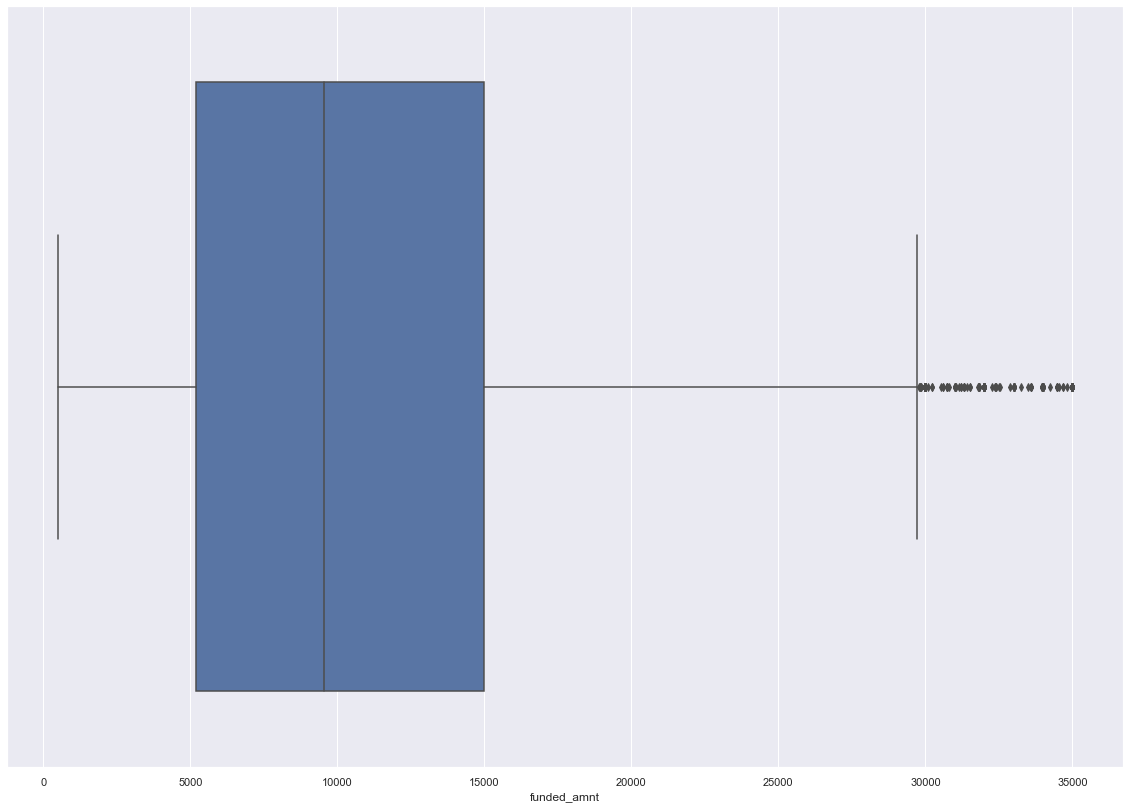

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


------------- funded_amnt_inv ------------------------


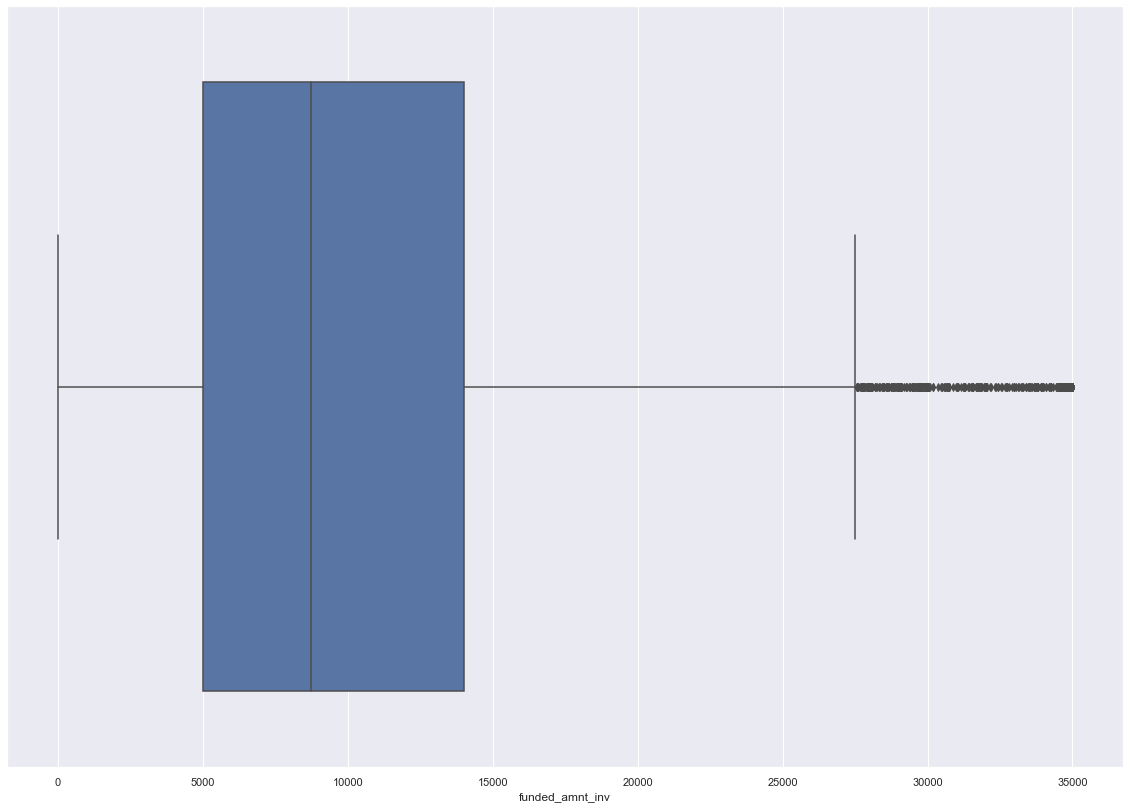

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


------------- int_rate ------------------------


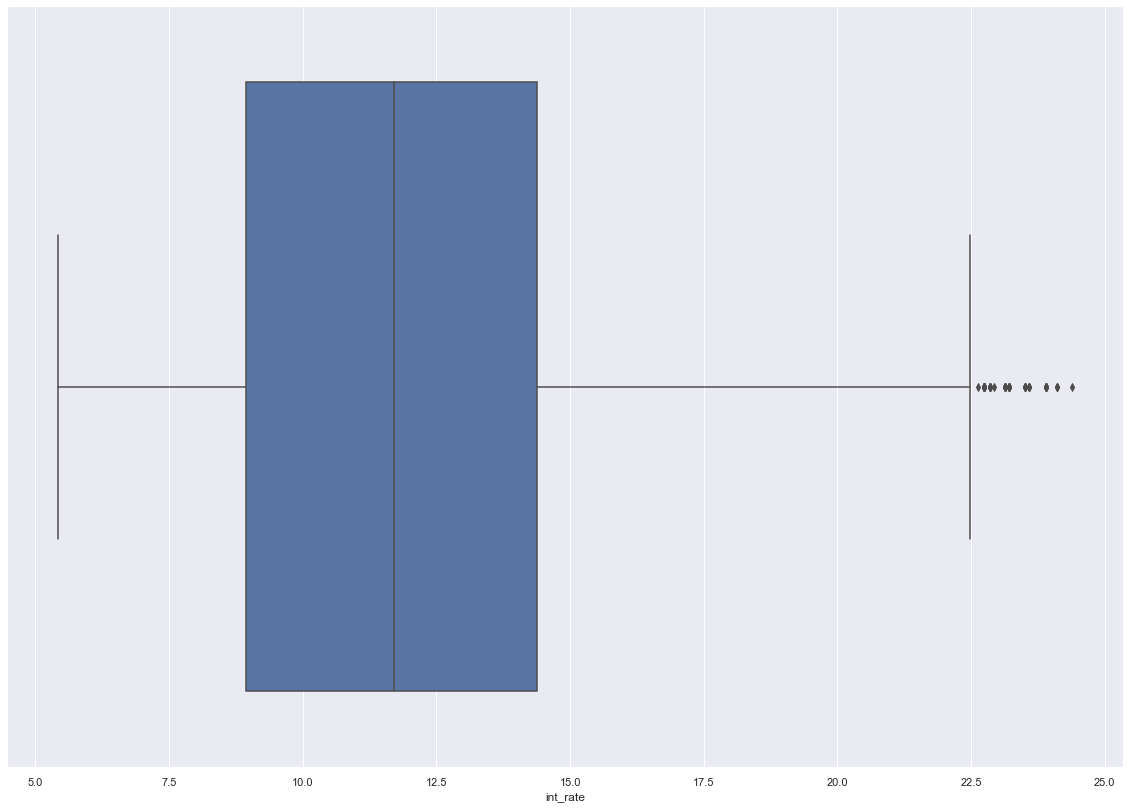

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


------------- installment ------------------------


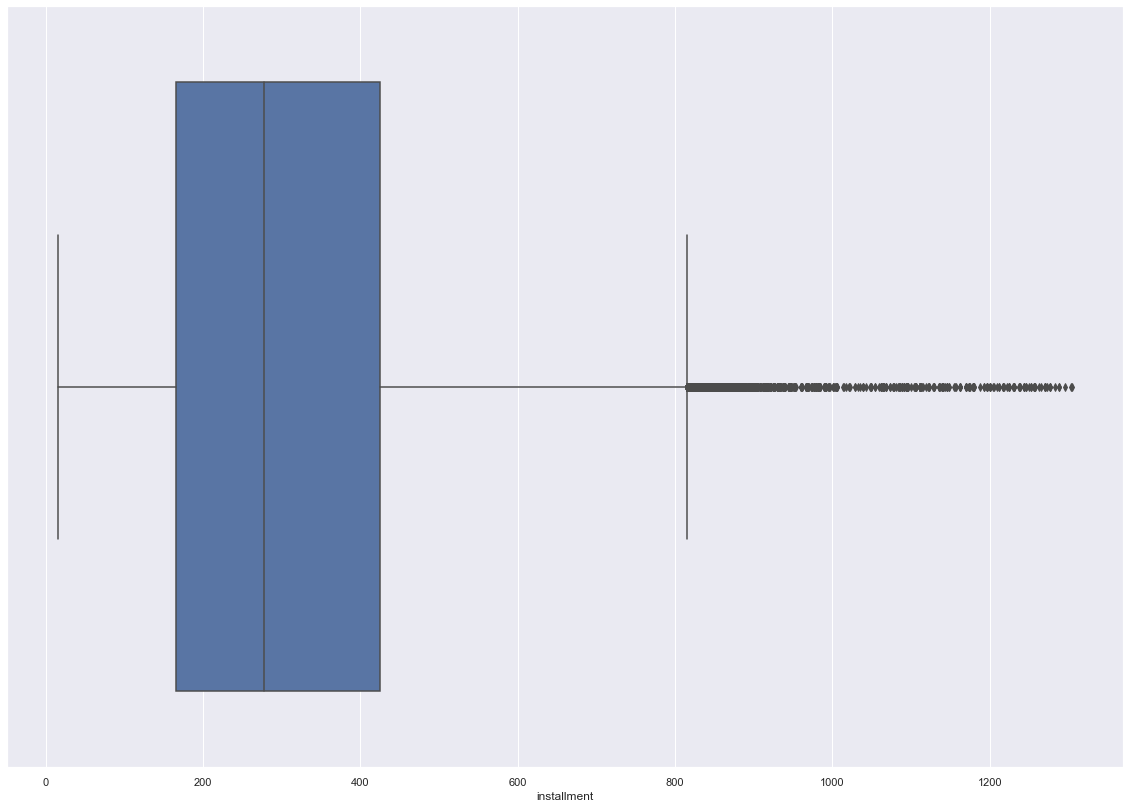

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


------------- annual_inc ------------------------


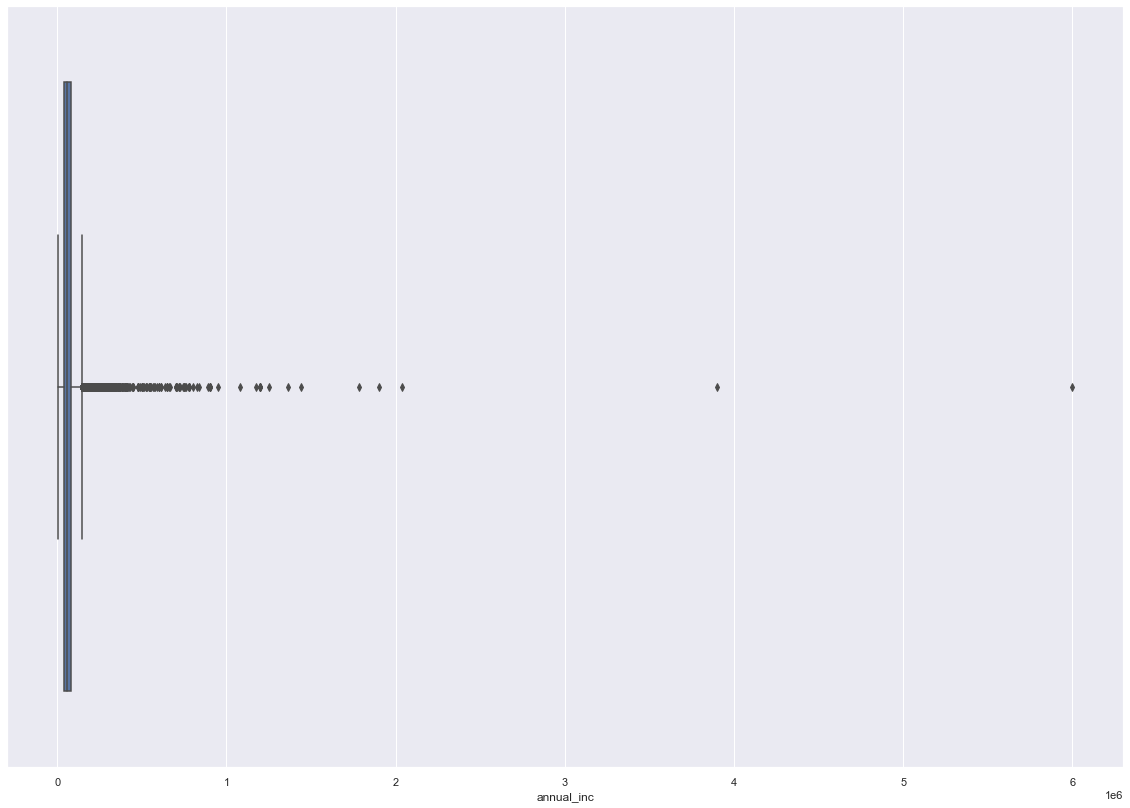

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


------------- dti ------------------------


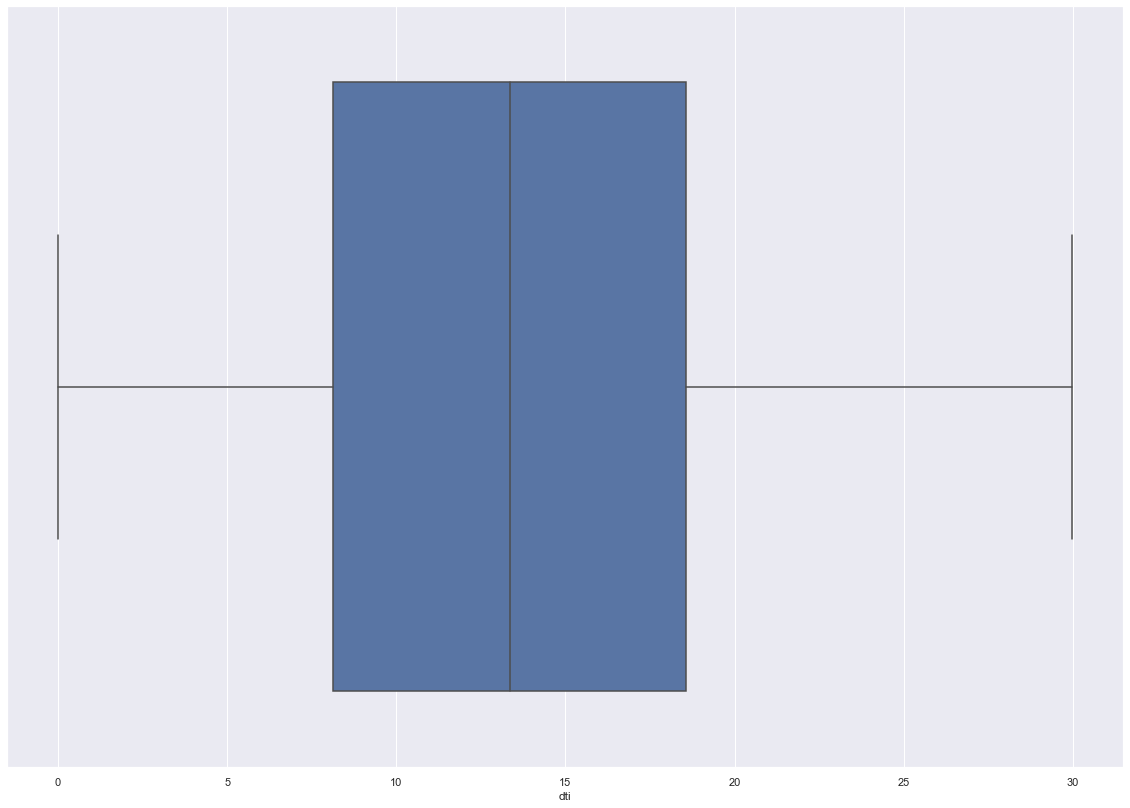

In [178]:
for i in continuous_columns:
    print("-------------", i, "------------------------")
    sns.boxplot(df[i])
    plt.show()

## Using PairPlot lets analyse if there is any relationship between continuous variables

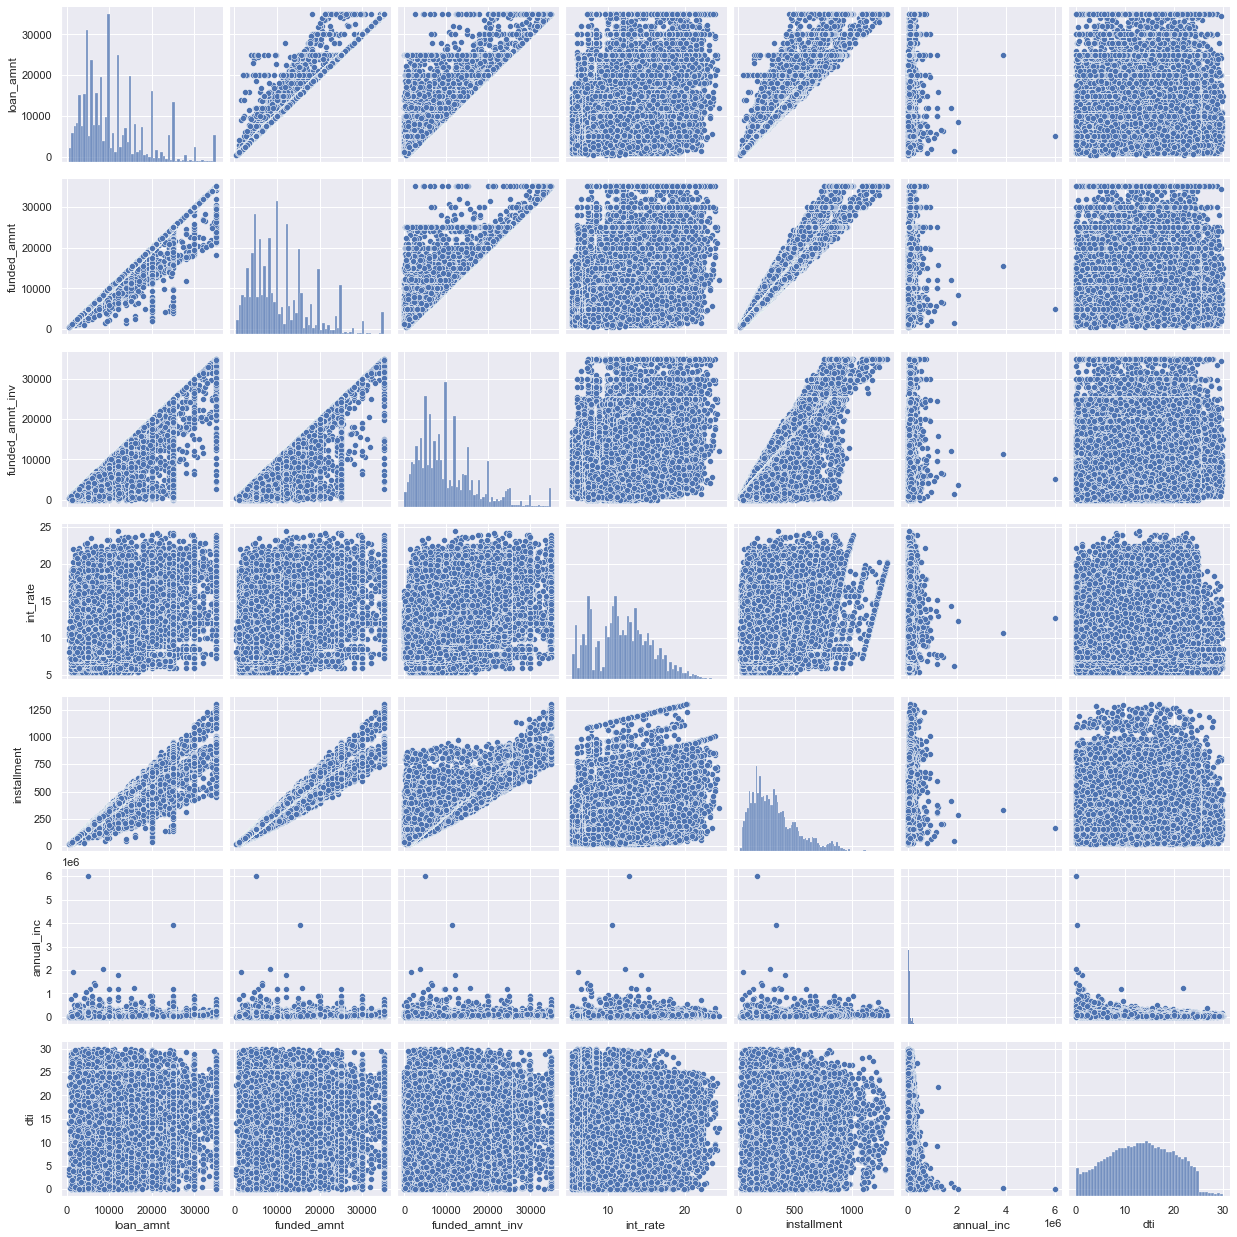

In [179]:
sns.pairplot(df[continuous_columns])

### We can see that in best case scenarios there should have been some positive relations between installment vs Annual income. But with increase in the installment amount we see not much increase in annual inc. Also, there is no positive relationship between annual inc and the Loan amount. The loan amount is increasing without much increase in annual inc. These trends increases the likelihood of loan getting into Charged Off state. But overall it seems that multivariate analyses wouldnt add much value to our analyses

### 

### we will start with analysing the continuous variables with respect to loan status

In [180]:
annual_inc_outlier = 350000

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='annual_inc'>

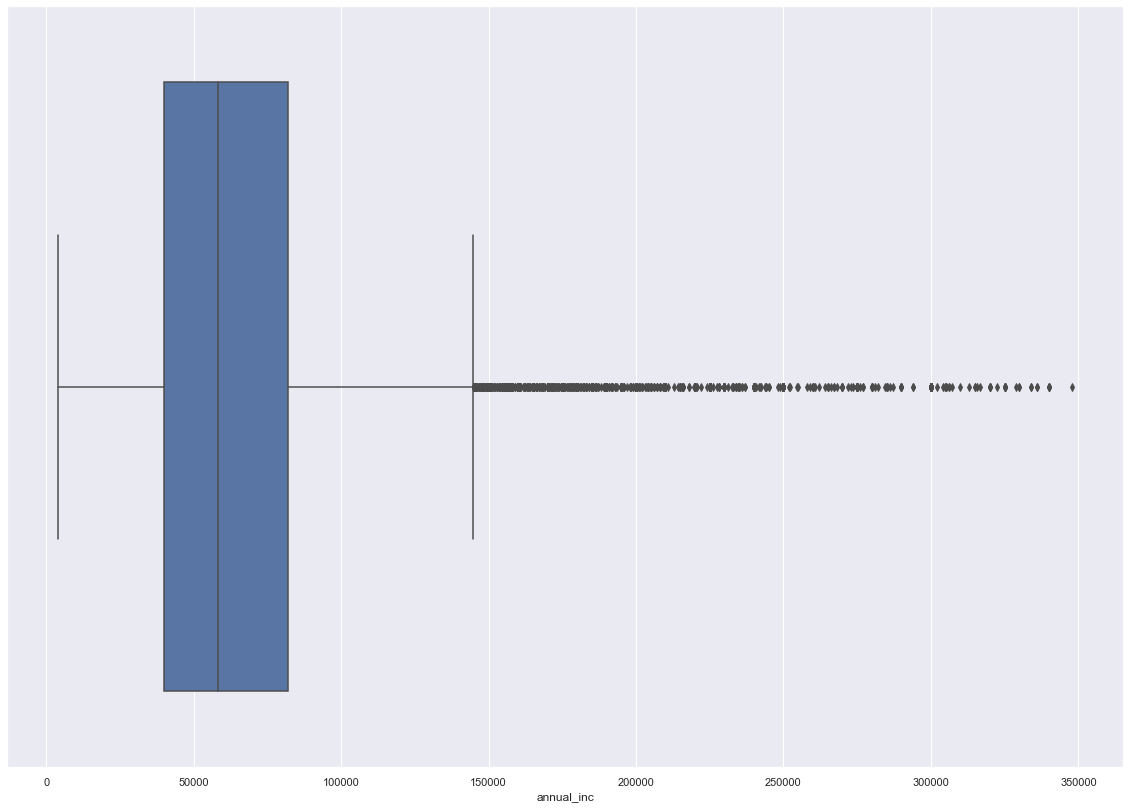

In [181]:
df_new = df[(df['annual_inc'] < 350000)]
sns.boxplot(df_new['annual_inc'])

## loan amount vs loan status

In [182]:
print ('number of cases where funded amount was more than the loan amount ',(df[(df['funded_amnt']) > (df['loan_amnt'])]).shape[0])

print ('number of cases where funded amount inv was more than the funded amount ',(df[(df['funded_amnt_inv']) > (df['funded_amnt'])]).shape[0])

number of cases where funded amount was more than the loan amount  0
number of cases where funded amount inv was more than the funded amount  0


### The trend for all the cases had been loan_amnt > funded_amnt > funded_amnt_inv. The actuall loan amount recieved by the customer is the funded_amnt_inv. So, in our analysis we would just use funded_amnt_inv as the loan amount

In [183]:
loan_amoun_bin=[0, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 28000, 35000]
loan_amoun_slot=['0-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-28000' ,'28000 and above']
df['loan_amnt_range']=pd.cut(df['funded_amnt_inv'], loan_amoun_bin, labels=loan_amoun_slot)

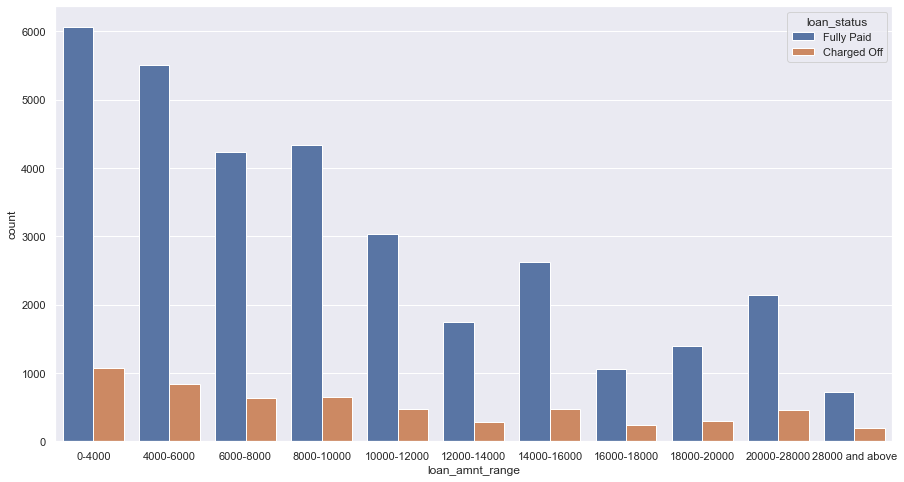

In [184]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='loan_amnt_range',hue='loan_status',data=df)
plt.show()#display

In [185]:
df_dti = df[(df['funded_amnt_inv'] < 10000)]
print('Charged Off percentage when funded_amnt_inv < 10000 = ', ((df_dti['loan_status'] == 'Charged Off').sum()/ df_dti.shape[0] ) * 100)

Charged Off percentage when funded_amnt_inv < 10000 =  13.724430026133188


In [186]:
df_dti = df[(df['funded_amnt_inv'] > 10000) & (df['funded_amnt_inv'] < 18000)]
print('Charged Off percentage when funded_amnt_inv is between 10000 and 18000 = ', ((df_dti['loan_status'] == 'Charged Off').sum()/ df_dti.shape[0] ) * 100)

Charged Off percentage when funded_amnt_inv is between 10000 and 18000 =  14.801888729213713


In [187]:
df_dti = df[(df['funded_amnt_inv'] > 18000)]
print('Charged Off percentage when funded_amnt_inv > 18000 = ', ((df_dti['loan_status'] == 'Charged Off').sum()/ df_dti.shape[0] ) * 100)

Charged Off percentage when funded_amnt_inv > 18000 =  18.316355948491257


### It seems that higher the loan amount, higher are the chances of getting into charged off state

### 

### interest rate vs loan status

In [188]:
interest_bin=[0, 6, 8, 10, 12, 14, 16, 25]
interest_slot=['0-6','6-8','8-10','10-12','12-14','14-16','above 16']
df['int_rate_range']=pd.cut(df['int_rate'], interest_bin, labels=interest_slot)

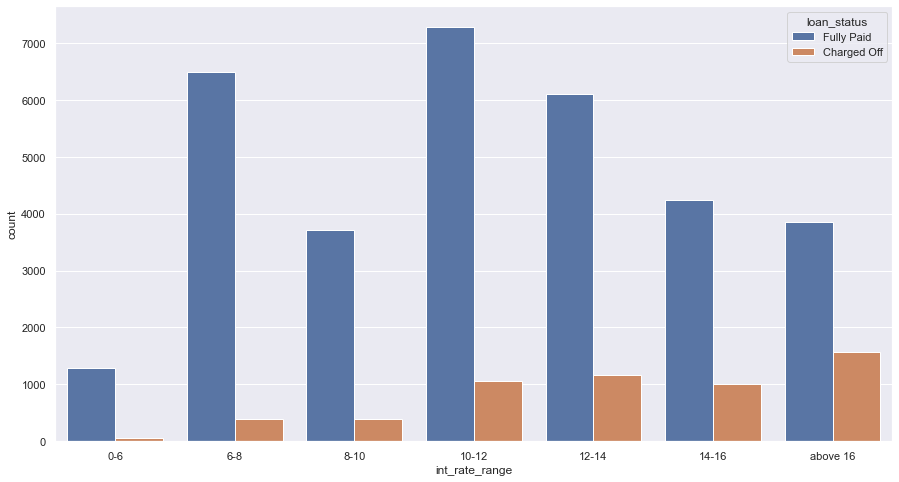

In [189]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='int_rate_range',hue='loan_status',data=df)
plt.show()

In [190]:
df_dti = df[(df['int_rate'] < 10)]
print('Charged Off percentage when int_rate < 6 = ', ((df_dti['loan_status'] == 'Charged Off').sum()/ df_dti.shape[0] ) * 100)

Charged Off percentage when int_rate < 6 =  6.621364050716831


In [191]:
df_dti = df[(df['int_rate'] > 10)]
print('Charged Off percentage when int_rate > 6 = ', ((df_dti['loan_status'] == 'Charged Off').sum()/ df_dti.shape[0] ) * 100)

Charged Off percentage when int_rate > 6 =  18.26663112600434


### It seems that higher the default rate, higher are the chances of loan getting Charged Off

## 

### Installment vs Loan Status
Installment alone would have less significane. The propotion of installment to their monthly income would give us a better insight. So calculating one derived variable monthly_inc_to_inst_ratio

In [192]:
df['monthly_inc_to_inst_ratio'] =  ((df['installment'])/(df['annual_inc'] / 12) * 100)

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='monthly_inc_to_inst_ratio'>

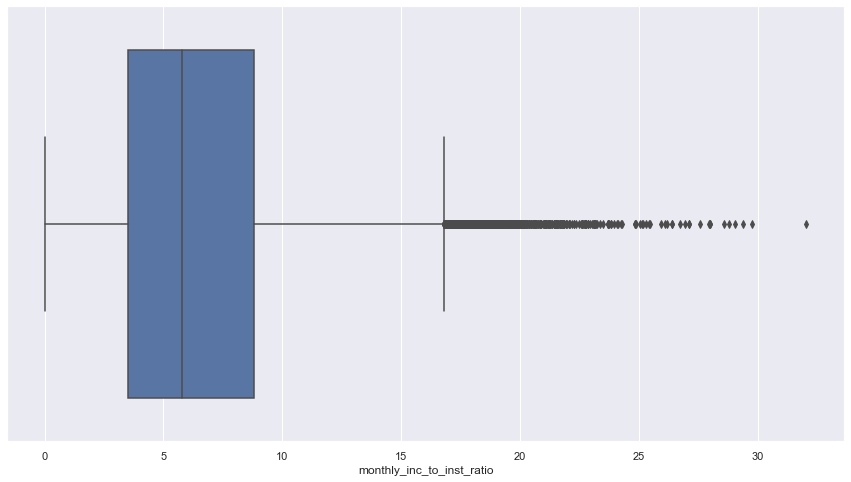

In [193]:
sns.boxplot(df['monthly_inc_to_inst_ratio'])

In [194]:
inst_ratio_bin=[0, 4, 5, 6, 7, 8, 9,10]
inst_ratio_slot=['0-4','4-5','5-6','6-7','7-8','8-9','9-10']
df['inst_ratio_range']=pd.cut(df['monthly_inc_to_inst_ratio'], inst_ratio_bin, labels=inst_ratio_slot)

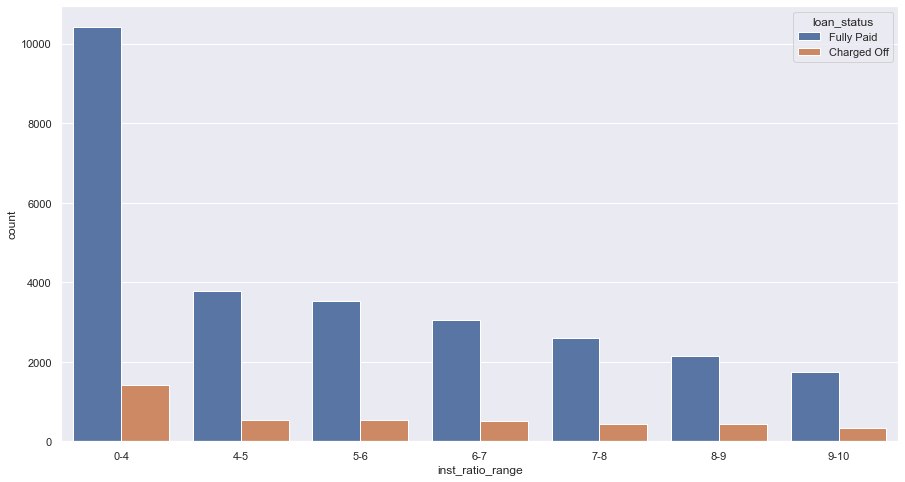

In [195]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='inst_ratio_range',hue='loan_status',data=df)
plt.show()

### plotting the inst_ratio_range outlier separately to see the distribution

In [196]:
df['inst_ratio_range_outlier']=pd.cut(df['monthly_inc_to_inst_ratio'], [15,18,21,24,27, 35], labels=['15-18','18-21', '21-24', '24-27', 'above 27'])

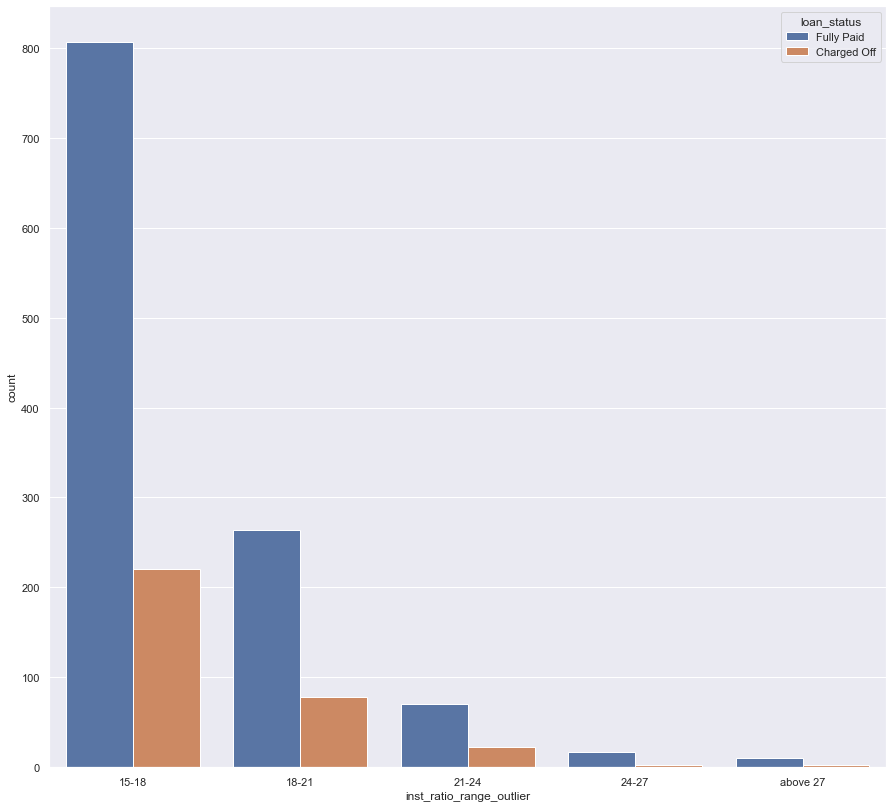

In [197]:
sns.set(rc = {'figure.figsize':(15,14)})
sns.countplot(x='inst_ratio_range_outlier',hue='loan_status',data=df)
plt.show()

In [230]:
df_dti = df[(df['monthly_inc_to_inst_ratio'] < 6)]
print('Charged Off percentage when monthly_inc_to_inst_ratio < 6 = ', ((df_dti['loan_status'] == 'Charged Off').sum()/ df_dti.shape[0] ) * 100)
print('\n')
df_dti = df[(df['monthly_inc_to_inst_ratio'] > 6)]
print('Charged Off percentage when monthly_inc_to_inst_ratio > 6 = ', ((df_dti['loan_status'] == 'Charged Off').sum()/ df_dti.shape[0] ) * 100)

Charged Off percentage when monthly_inc_to_inst_ratio < 6 =  12.280875507576509


Charged Off percentage when monthly_inc_to_inst_ratio > 6 =  17.11907740847522


### It seems that higher the proption of installment with respect to montly income, higer are the chances for the loan getting charged Off.

## dti vs loan_status

In [202]:
dti_bin=[0, 6, 8, 10, 12, 14, 16, 18, 20, 30]
dti_slot=['0-6','6-8','8-10','10-12','12-14','14-16','16-18', '18-20','above 20']
df['dti_range']=pd.cut(df['dti'], dti_bin, labels=dti_slot)

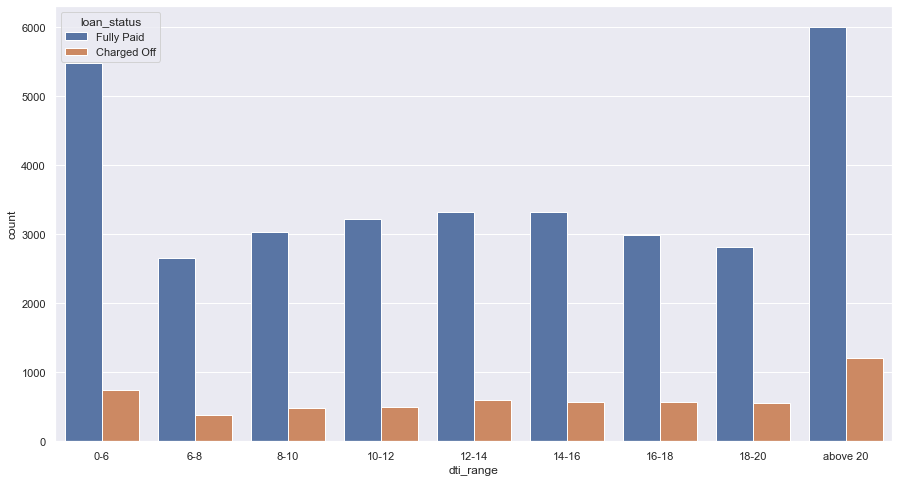

In [203]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='dti_range',hue='loan_status',data=df)
plt.show()

In [204]:
df_dti = df[(df['dti'] < 6)]
print('Charged Off percentage when dti < 6 = ', ((df_dti['loan_status'] == 'Charged Off').sum()/ df_dti.shape[0] ) * 100)

Charged Off percentage when dti < 6 =  12.084118016321407


In [205]:
df_dti = df[(df['dti'] > 6)]
print('Charged Off percentage when dti > 6 = ', ((df_dti['loan_status'] == 'Charged Off').sum()/ df_dti.shape[0] ) * 100)

Charged Off percentage when dti > 6 =  15.079735148745687


In [206]:
df_dti = df[(df['dti'] > 20)]
print('Charged Off percentage when dti > 20 = ', ((df_dti['loan_status'] == 'Charged Off').sum()/ df_dti.shape[0] ) * 100)

Charged Off percentage when dti > 20 =  16.733786974031382


## It seems that higher the dti, more likely are the chances of loan getting Charged Off

### 

## Term vs Loan Status

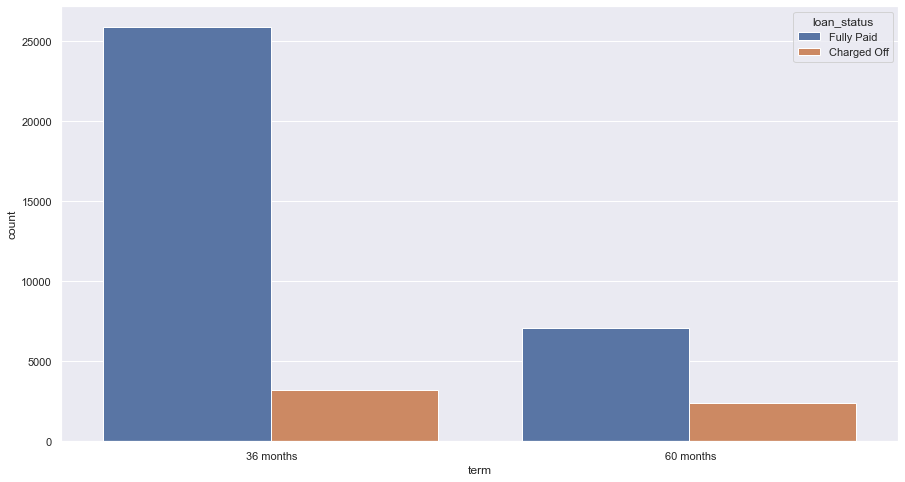

In [207]:
sns.countplot(x='term',hue='loan_status',data=df)
plt.show()

In [208]:
df_term = df[(df['term'] == ' 36 months')]
print('Charged Off percentage when term is 36 months = ', ((df_term['loan_status'] == 'Charged Off').sum()/ df_term.shape[0] ) * 100)

Charged Off percentage when term is 36 months =  11.090871597470443


In [209]:
df_term = df[(df['term'] == ' 60 months')]
print('Charged Off percentage when term is 60 months = ', ((df_term['loan_status'] == 'Charged Off').sum()/ df_term.shape[0] ) * 100)

Charged Off percentage when term is 60 months =  25.313785465668175


### The Charged Off percentage is more when the term is 60 months in comparison to 36 months but at the same time it is evident that a major percentage of the loans are for 36 month, Lets check the distribution of loan amount with respect of term

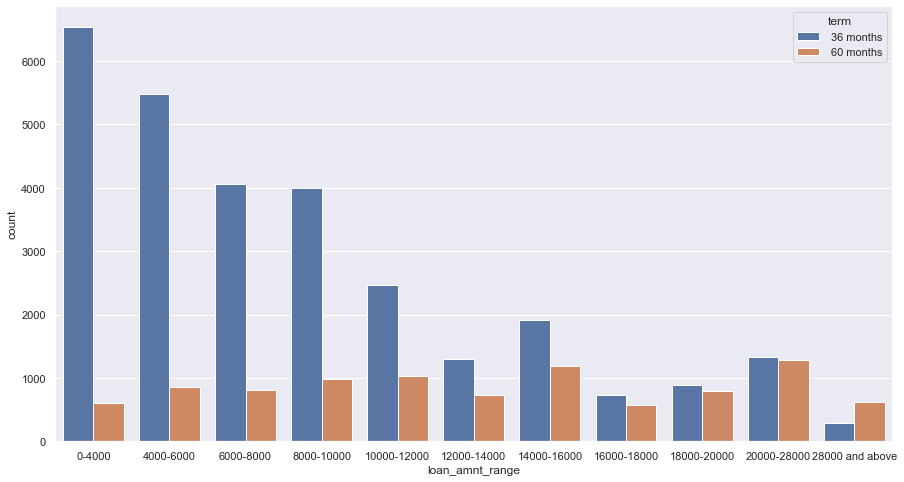

In [210]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='loan_amnt_range',hue='term',data=df)
plt.show()#display

### It seems that 60 months term is more in propotion compared to 36 months term for higher loan amount. Earlier also we saw that propability of loan getting Charged Off is high for higher amounts. So, its not the loan term but high loan amount which is responsible for high charged off cases

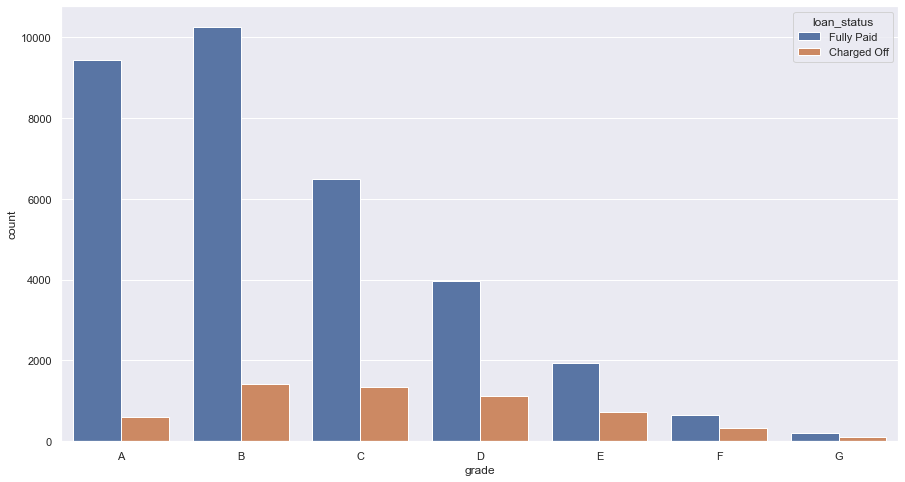

In [211]:
sns.countplot(x='grade',hue='loan_status',data=df, order=['A', 'B', 'C','D','E', 'F','G'])
plt.show()

In [212]:
def calculateGradePerc(own):
    df_ownership = df[(df['grade'] == own)]
    print('Charged Off percentage when grade is ', val , ' = ',((df_ownership['loan_status'] == 'Charged Off').sum()/ df_ownership.shape[0] ) * 100)


for val in df['grade'].unique():
    calculateGradePerc(val)

Charged Off percentage when grade is  B  =  12.205567451820128
Charged Off percentage when grade is  C  =  17.19428133775849
Charged Off percentage when grade is  A  =  5.993031358885018
Charged Off percentage when grade is  E  =  26.84941794968081
Charged Off percentage when grade is  F  =  32.6844262295082
Charged Off percentage when grade is  D  =  21.98623402163225
Charged Off percentage when grade is  G  =  33.77926421404682


### It seems that LC assigns grades based on many parameters like annual inc, emp length, purpose of the loan etc. The A grade customers have least probibility of defaulting and G being the heighest. The maximum loan distribution if for A and B grade customers, We will ignore the grades in our analysis as this itself seems to be a derived variable by LC

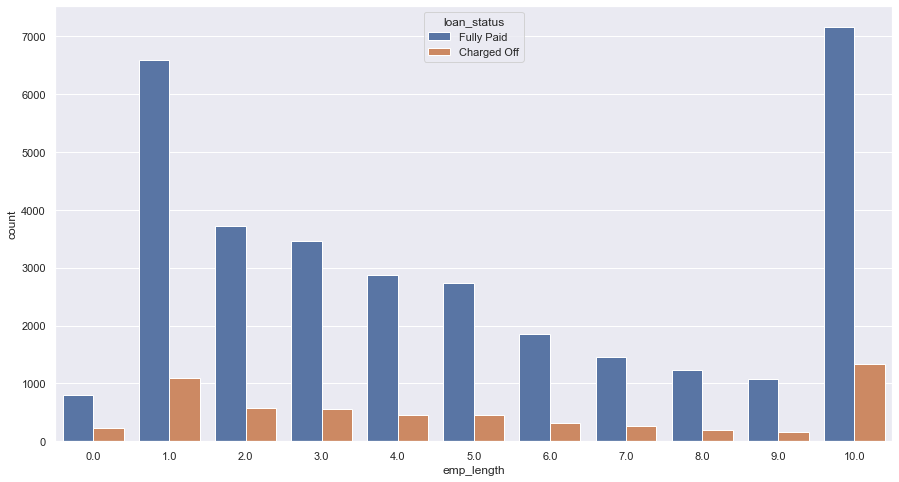

In [213]:
df['emp_length'] = pd.to_numeric(df['emp_length'])
sns.countplot(x='emp_length',hue='loan_status',data=df)
plt.show()

In [214]:
df_emp_len = df[(df['emp_length'] == 0  )]
print('Charged Off percentage when emp_length is 0 = ',((df_emp_len['loan_status'] == 'Charged Off').sum()/ df_emp_len.shape[0] ) * 100)

i = 1
while i < 10:
    df_emp_len = df[(df['emp_length'] >= i) & (df['emp_length'] < i+1)]
    print('Charged Off percentage when emp_length is between ', i, ' and ', i+1, ' = ',((df_emp_len['loan_status'] == 'Charged Off').sum()/ df_emp_len.shape[0] ) * 100)
    i = i+1
    
df_emp_len = df[(df['emp_length'] >= 10  )]
print('Charged Off percentage when emp_length is more than 10 = ',((df_emp_len['loan_status'] == 'Charged Off').sum()/ df_emp_len.shape[0] ) * 100)


Charged Off percentage when emp_length is 0 =  22.07163601161665
Charged Off percentage when emp_length is between  1  and  2  =  14.263384134427511
Charged Off percentage when emp_length is between  2  and  3  =  13.213703099510605
Charged Off percentage when emp_length is between  3  and  4  =  13.833499501495513
Charged Off percentage when emp_length is between  4  and  5  =  13.824057450628366
Charged Off percentage when emp_length is between  5  and  6  =  14.339386349405133
Charged Off percentage when emp_length is between  6  and  7  =  14.160516605166052
Charged Off percentage when emp_length is between  7  and  8  =  15.371127995324372
Charged Off percentage when emp_length is between  8  and  9  =  14.146341463414632
Charged Off percentage when emp_length is between  9  and  10  =  12.887438825448614
Charged Off percentage when emp_length is more than 10 =  15.68096135721018


### It seems that there is no specific relationship between emp_length and loan charged off. Though the customers with emp_length as 0 are at a substantially higher risk of defaulting the loan

## home_ownership vs loan_status

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

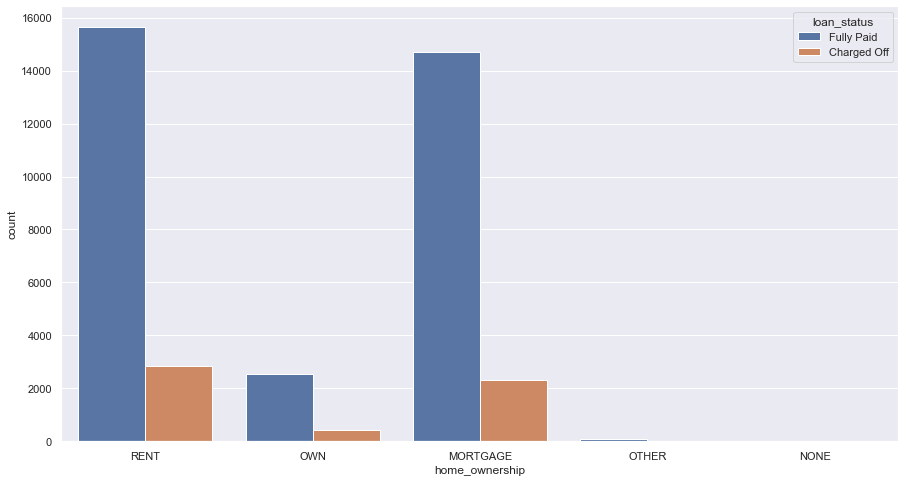

In [215]:
sns.countplot(x='home_ownership',hue='loan_status',data=df)

In [216]:
def calculateOwnPerc(own):
    df_ownership = df[(df['home_ownership'] == own)]
    print('Charged Off percentage when ownership is ', val , ' = ',((df_ownership['loan_status'] == 'Charged Off').sum()/ df_ownership.shape[0] ) * 100)


for val in df['home_ownership'].unique():
    calculateOwnPerc(val)
    

Charged Off percentage when ownership is  RENT  =  15.362554112554113
Charged Off percentage when ownership is  OWN  =  14.890756302521007
Charged Off percentage when ownership is  MORTGAGE  =  13.67134715939134
Charged Off percentage when ownership is  OTHER  =  18.367346938775512
Charged Off percentage when ownership is  NONE  =  0.0


### It seems that customers with Rented property are more likely to Default the loan payment when compared to Mortgage and Self owned home. The Ownership as 'Other' can be ignored as it relatively very small in number

## verification_status vs loan_status

<AxesSubplot:xlabel='verification_status', ylabel='count'>

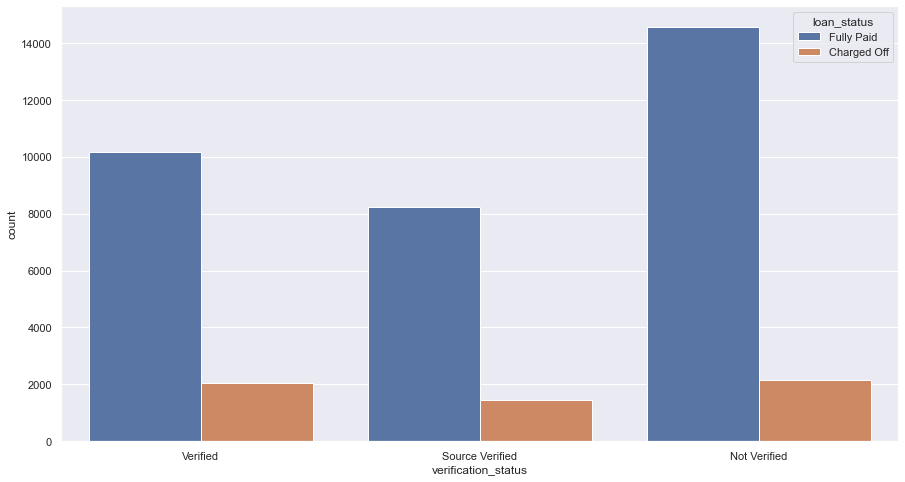

In [217]:
sns.countplot(x='verification_status',hue='loan_status',data=df)

In [218]:
for val in df['verification_status'].unique():
    df_verification = df[(df['verification_status'] == val)]
    print('Charged Off percentage when verification_status is ', val , ' = ',((df_verification['loan_status'] == 'Charged Off').sum()/ df_verification.shape[0] ) * 100)


Charged Off percentage when verification_status is  Verified  =  16.803211535310503
Charged Off percentage when verification_status is  Source Verified  =  14.818642141159449
Charged Off percentage when verification_status is  Not Verified  =  12.830957230142568


### Though verification status as Not Verified have less percentage of Charged Off but this should be the basis of not doing the verification as the status is unknown which can be either shifted to verification failed or verification succeeded. So we can ignore the Not verified case. Otherwise Source Verified loans and less likely to get defaulted in comparison to simple verification

## purpose vs loan status

<AxesSubplot:xlabel='purpose', ylabel='count'>

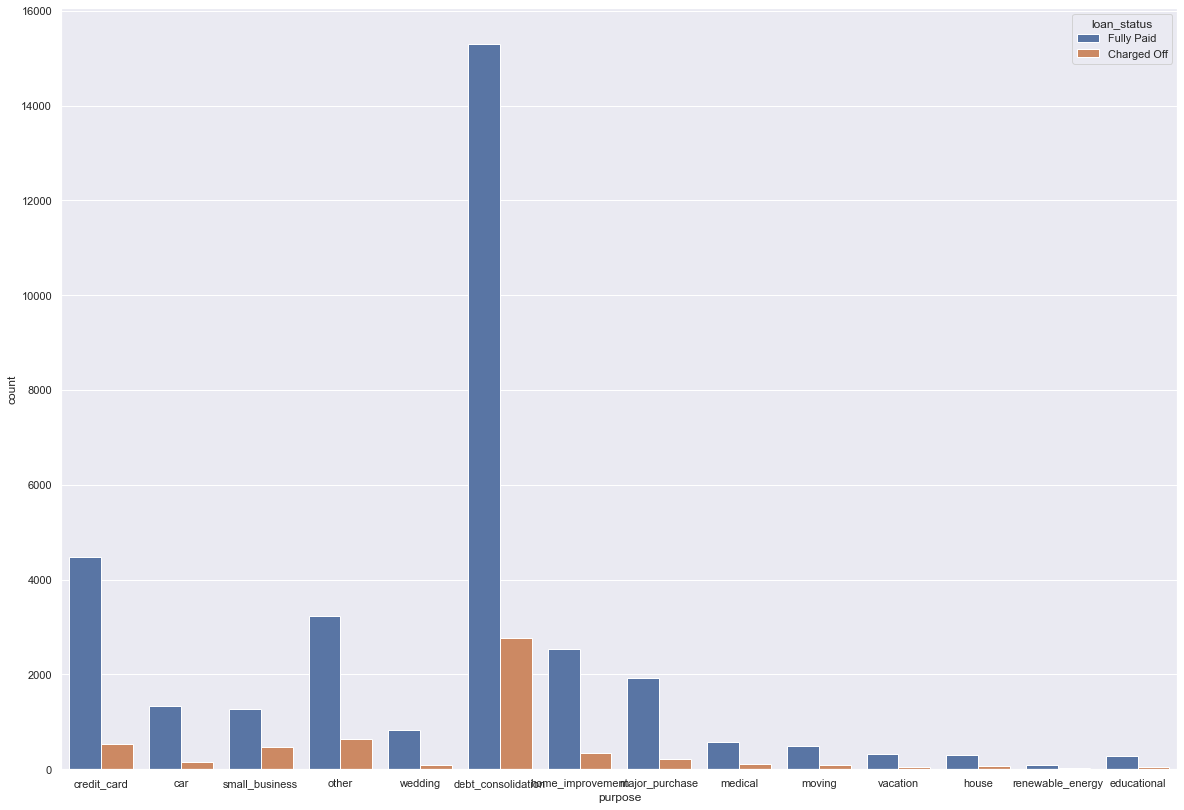

In [219]:
sns.set(rc = {'figure.figsize':(20,14)})
sns.countplot(x='purpose',hue='loan_status',data=df)

In [220]:
for val in df['purpose'].unique():
    df_purpose = df[(df['purpose'] == val)]
    print('Charged Off percentage for purpose ', val , ' = ',((df_purpose['loan_status'] == 'Charged Off').sum()/ df_purpose.shape[0] ) * 100)


Charged Off percentage for purpose  credit_card  =  10.781778396658046
Charged Off percentage for purpose  car  =  10.67378252168112
Charged Off percentage for purpose  small_business  =  27.08095781071836
Charged Off percentage for purpose  other  =  16.377749029754206
Charged Off percentage for purpose  wedding  =  10.367170626349893
Charged Off percentage for purpose  debt_consolidation  =  15.325394627527
Charged Off percentage for purpose  home_improvement  =  12.069565217391304
Charged Off percentage for purpose  major_purchase  =  10.325581395348838
Charged Off percentage for purpose  medical  =  15.565345080763581
Charged Off percentage for purpose  moving  =  15.972222222222221
Charged Off percentage for purpose  vacation  =  14.133333333333335
Charged Off percentage for purpose  house  =  16.076294277929154
Charged Off percentage for purpose  renewable_energy  =  18.627450980392158
Charged Off percentage for purpose  educational  =  17.23076923076923


### The loan for the purpose of small business has a very high probability of getting into Charged Off state when compared to other purposes. The loan for the purpose of - credit_card, car, wedding, major_purchase are more likely to get fully paid

### pub_rec_bankruptcies vs loan status

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

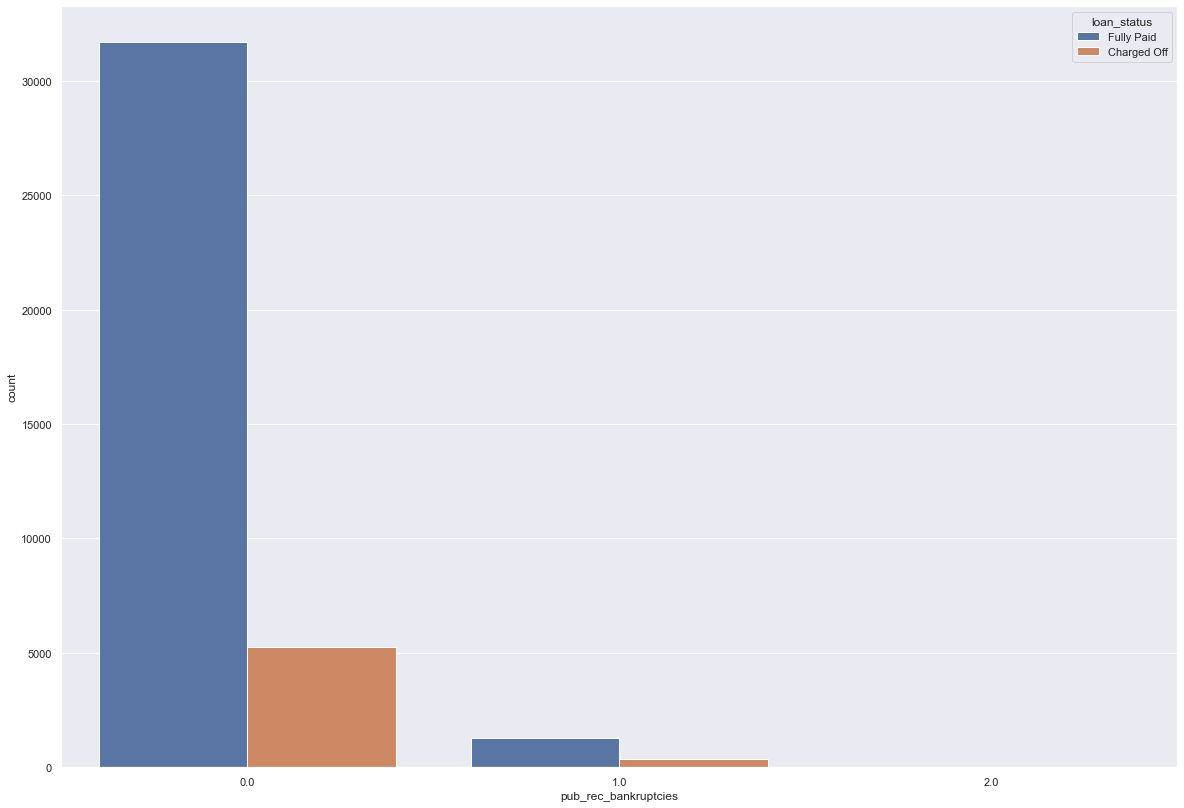

In [221]:
sns.countplot(x='pub_rec_bankruptcies',hue='loan_status',data=df)

In [222]:
df['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

In [223]:
for val in df['pub_rec_bankruptcies'].unique():
    df_bankrpt = df[(df['pub_rec_bankruptcies'] == val)]
    print('Charged Off percentage for pub_rec_bankruptcies ', val , ' = ',((df_bankrpt['loan_status'] == 'Charged Off').sum()/ df_bankrpt.shape[0] ) * 100)


Charged Off percentage for pub_rec_bankruptcies  0.0  =  14.238527142276974
Charged Off percentage for pub_rec_bankruptcies  1.0  =  22.35797189981674
Charged Off percentage for pub_rec_bankruptcies  2.0  =  40.0


### It seems that for pub_rec_bankruptcies more than 0, there is a high probability of loan getting Charged Off

## issue month vs loan status

<AxesSubplot:xlabel='issue_month', ylabel='count'>

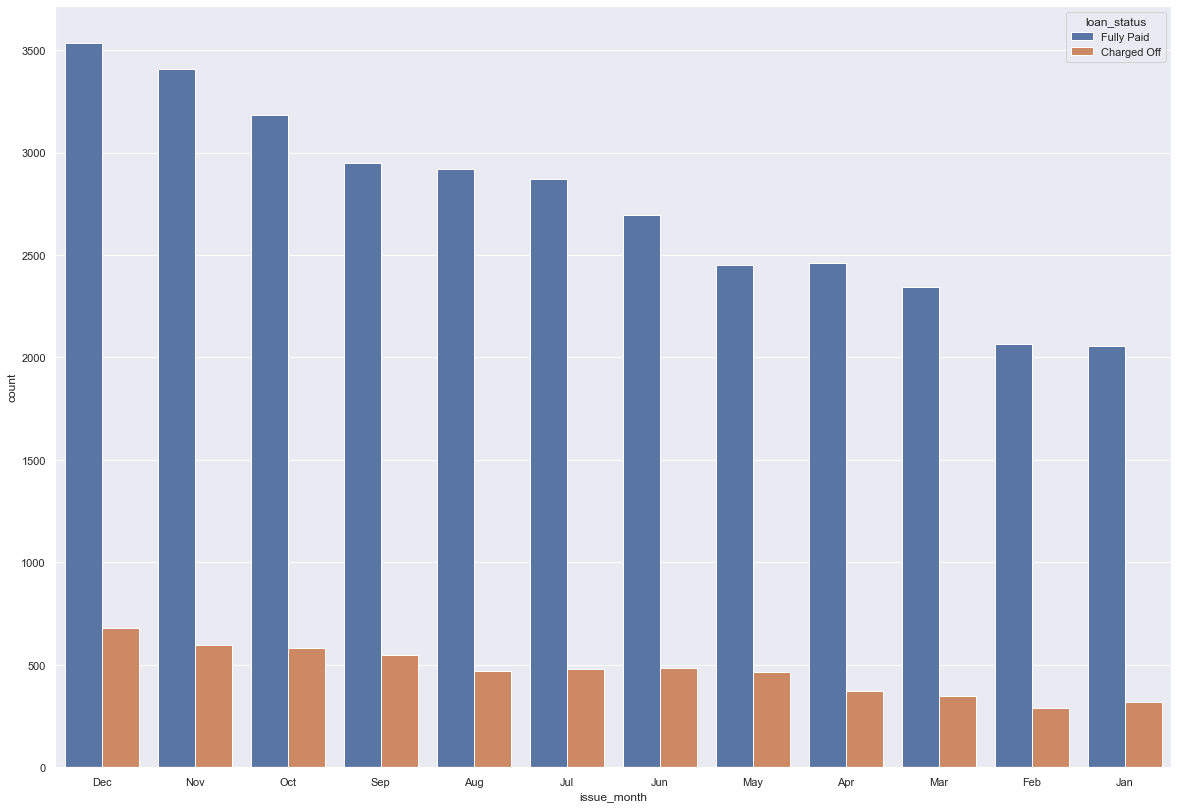

In [224]:
sns.countplot(x='issue_month',hue='loan_status',data=df)

In [225]:
for val in df['issue_month'].unique():
    df_iss_month = df[(df['issue_month'] == val)]
    print('Charged Off percentage for issue_month ', val , ' = ',((df_iss_month['loan_status'] == 'Charged Off').sum()/ df_iss_month.shape[0] ) * 100)


Charged Off percentage for issue_month  Dec  =  16.085409252669038
Charged Off percentage for issue_month  Nov  =  14.92760858711932
Charged Off percentage for issue_month  Oct  =  15.421430470619516
Charged Off percentage for issue_month  Sep  =  15.63750714694111
Charged Off percentage for issue_month  Aug  =  13.81345926800472
Charged Off percentage for issue_month  Jul  =  14.294240525216354
Charged Off percentage for issue_month  Jun  =  15.188679245283017
Charged Off percentage for issue_month  May  =  15.964371360054812
Charged Off percentage for issue_month  Apr  =  13.069586718474039
Charged Off percentage for issue_month  Mar  =  12.894834633965068
Charged Off percentage for issue_month  Feb  =  12.298558100084819
Charged Off percentage for issue_month  Jan  =  13.493064312736443


### It seems that safest month for loan issue is Feb and Mar where as December is the most risky month for loan getting into Charged Off state

## Summary - In the following cases its more likely that the loan would get Charged Off
1. Higher the proportion of installment to the monthly salary of a customer higher is probability of charged off
2. Higher the loan amount higher is the probability higher is probability of charged off
3. Loan for the purpose of 'small business' has a very high probability of charged off followed by 'debt consolidation' purpose and 'house' purpose
4. loan issued during December has a high probability of charged off compared to Feb and Mar months
5. Customers with Number of public record bankruptcies greater than 0, are more likely to get loan Charged Off 
6. Customer with no employment are more likely to get loan Charged Off 
7. Higher the dti, higher is the probability of loan getting Charged Off 